<hr style="height: 1px;">
<i>This notebook was authored by the 8.316 Course Team, Copyright 2023 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

<h1>Lesson 2: Binomial, Poisson, and Gaussian Distributions</h1>


<a name='section_2_0'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L2.0 Overview</h2>


<h3>Navigation</h3>

<table style="width:100%">
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_2_1">L2.1 Introduction to Binomial Distribution</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_2_1">L2.1 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_2_2">L2.2 Applications Using the Binomial Distribution</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_2_2">L2.2 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_2_3">L2.3 The Poisson Distribution</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_2_3">L2.3 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_2_4">L2.4 Poisson Distribution Continued</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_2_4">L2.4 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_2_5">L2.5 The Gaussian Distribution</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_2_5">L2.5 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_2_6">L2.6 Uncertainties in Measurement</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_2_6">L2.6 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_2_7">L2.7 Propagating Uncertainties</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_2_7">L2.7 Exercises</a></td>
    </tr>
</table>



<h3>Learning Objectives</h3>

By the end of this Lesson, you should be able to do the following:

- Understand how and when to use Binomial, Poisson, and Gaussian distributions.
- Understand how uncertainties propagate in measurements

<h3>Importing Data (Colab Only)</h3>

If you are in a Google Colab environment, run the cell below to import the data for this notebook. Otherwise, if you have downloaded the course repository, you do not have to run the cell below.

See the source and attribution information below:

>data: data/L02/tmpdata.txt, data/L02/tmpmc.txt<br>
>source:  https://arxiv.org/pdf/1104.0699.pdf<br>
>attribution: CDF Collaboration, arXiv:1104.0699v2<br>
>license type: https://arxiv.org/licenses/nonexclusive-distrib/1.0/license.html

<h3>Importing Libraries</h3>

Before beginning, run the cell below to import the relevant libraries for this notebook.


In [1]:
#>>>RUN: L2.0-runcell01

# The documentation to these packages is linked beside them if you have questions

import numpy as np                 #https://numpy.org/doc/stable/ 
from scipy.special import comb     #https://docs.scipy.org/doc/scipy/reference/special.html
import scipy.stats as stats        #https://docs.scipy.org/doc/scipy/reference/stats.html
import matplotlib.pyplot as plt    #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

<h3>Setting Default Figure Parameters</h3>

The following code cell sets default values for figure parameters.

In [2]:
#>>>RUN: L2.0-runcell02

#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (7,4)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title

<!--start-block-->
<a name='section_1_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L1.3 Sampling events</h2>
    
| [Top](#section_1_0) | [Previous Section](#section_1_2) | [Exercises](#exercises_1_3) | [Next Section](#section_1_4) |

In [ ]:
#>>>RUN: L1.2-slides

from IPython.display import IFrame

IFrame(src='https://mitx-8s50.github.io/slides/L01/slides1.html', width=975, height=550)

<h3>Overview</h3>

Let's try something a bit more complicated. In the following code, we are going to sample TWO random variables described by uniform (flat) distributions. Then, we'll define a new random variable that's the SUM of the two sampled values. The "observed" value of a random number (i.e., what you get when you sample a distribution) is also called a "realization".

In [ ]:
#>>>RUN: L1.3-runcell01

#Let's sample a uniform distribution 10k times each
bkg1 = np.random.uniform(0,10, 1000)
bkg2 = np.random.uniform(0,10, 1000) #this outputs an array of 10,000

#Now we sum them
data = bkg1 + bkg2 #since bkg1 and 2 are numpy arrays, doing this adds element-wise (called "broadcasting")


def getHist(data,useDensity=False):
    """Get hist y values, bin edges, and bin centers as np arrays"""
    histy, bin_edges = np.histogram(data, bins=100,density=useDensity) #<==== Note the density here that turns it into a pdf
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    print("int:",np.sum(histy*(bin_edges[1:] - bin_edges[:-1])))#p(x)*dx
    return (histy, bin_edges, bin_centers)

def plotData(data,useDensity=False):
    #plotting-------------------
    #plot size
    #fig, ax = plt.subplots(figsize=(9,6)) #optionally set the figure size here
    
    #plot data
    histy, bin_edges, bin_centers = getHist(data,useDensity)
    plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
    
    #plot labels and style
    plt.xlabel('x', fontsize=15) #Label x
    plt.ylabel('N samples', fontsize=15) #Label y
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

def plotDataNormalized(data):
    histy, bin_edges, bin_centers = getHist(data)
    # normalize the hist y values to the total number of samples (integral)
    integral = len(data)
    norm_histy = histy / integral # again, division is broadcast to elements of histy
    plt.plot(bin_centers,norm_histy,drawstyle = 'steps-mid')
    plt.xlabel('x', fontsize=15) #Label x
    plt.ylabel('Relative probability', fontsize=15) #Label y
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

plotData(data,False)
#plotDataNormalized(data)

So, what distribution are we sampling when we generate this new random variable? 

Let's derive it analytically. However, before we do that, let's first define a few statistical quantities. When these quantities are calculated for a specific sample of events, they are called "observables". 

To understand this, we need to define a probability distribution function, or "PDF". By definition, the integral of a PDF is always equal to 1. 

When we sample a uniform distribution from 0 to 10, we are sampling random numbers in that range. We can characterize the process of taking a random sample of a PDF $p(x)$ by defining the probability $P_{ab}(X)$ that a number is sampled between $a$ and $b$ as: 

$$P_{ab}(X)=\int_{a}^{b}p(x)dx$$

or, in other words, the probability is given by the integral of $p(x)$ over that range. As expected, the probability of observing a number within the entire range of the PDF will always equal 1. 

$$1=\int_{-\infty}^{\infty}p(x)dx$$

For a flat distribution from a to b, $p(x)$ is given by:

$$p_{flat}(x)=\frac{1}{b-a}$$  

To check this, let's just count events in our range. If we restrict our range to $x_{min} < x < x_{max}$ (where $x_{min}\gt a$ and $x_{max} \lt b$), the probability will then be 

$$\int_{x_{min}}^{x_{max}}\frac{1}{b-a}dx = \frac{x_{max}-x_{min}}{b-a}$$

Let's check this "ideal" probability by doing an "observation" of the probability.

In [ ]:
#>>>RUN: L1.3-runcell02

#define a=xmin and b=xmax
xmin=2
xmax=5

#sample
bkg1 = np.random.uniform(0,10, 10000)
#now count
prob=0
total=0
for x in bkg1:
    total+=1
    if x > xmin and x < xmax :
        prob+=1
        
print("Probability that we are between a and b is: ",prob/total, "true probability is:",(xmax-xmin)/10)

So, we see that we get a number very close to the expected value. It is not exact, because now we are dealing with sampled events. We will get back to the lack of exactness later on. For now, try varying the number of samples to see how the difference from the true value changes.  

Now, in addition to having a PDF, we can define something called the cumulative distribution function (CDF). This function is similar to the probability, except we integrate one end of the PDF from negative infinity. 

$$\mathrm{CDF}(x)=\int_{-\infty}^{x} p(u)du$$

This is now a function of $x$ that involves an integral over the PDF. Defined this way, the CDF for a given $x$ is the total probability that lies in values below that $x$. It can also be defined the opposite way, accounting for total probability of values above the $x$.

Let's display PDFs and their associated CDFs using the `scipy.stats` module, for both the uniform and normal distributions. The normal distribution will be studied in detail later on. 

In [ ]:
#>>>RUN: L1.3-runcell03

def plot_pdf_cdf_uniform(x):
    #plotting-------------------
    #plot size
    fig, ax = plt.subplots(figsize=(9,6))

    #plot data
    ax.plot(x, stats.uniform.pdf(x), 'k-', lw=2, label='PDF')  # PDF of a standard uniform distribution
    ax.plot(x, stats.uniform.cdf(x), 'k--', lw=2, label='CDF')  # CDF of a standard uniform distribution

    #plot labels and style
    plt.title("PDF and CDF of a standard uniform distribution", fontsize=15)
    plt.legend(fontsize=12)
    plt.xlabel('x', fontsize=15) #Label x
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

x = np.linspace(-2,2,100)
plot_pdf_cdf_uniform(x)

In [ ]:
#>>>RUN: L1.3-runcell04

def plot_pdf_cdf_normal(x):
    #plotting-------------------
    #plot size
    fig, ax = plt.subplots(figsize=(9,6))

    #plot data
    ax.plot(x, stats.norm.pdf(x), 'k-', lw=2, label='PDF')  # PDF of a standard normal distribution
    ax.plot(x, stats.norm.cdf(x), 'k--', lw=2, label='CDF')  # CDF of a standard normal distribution

    #plot labels and style
    plt.title("PDF and CDF of a standard normal distribution", fontsize=15)
    plt.legend(fontsize=12)
    plt.xlabel('x', fontsize=15) #Label x
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
x = np.linspace(-5,5,100)
plot_pdf_cdf_normal(x)

<!--start-block-->
### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-1.3.1: PDF and CDF</span>

For any valid (i.e. corresponding to some possible probability distribution) PDF, what is the maximum value of its corresponding CDF? Enter a number.

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
1
</pre>
        
**EXPLANATION:**
    
To be a valid probability distribution, summing (integrating) the probabilities over all values of `x` must yield exactly 1. Since this sum (integration) is the definition of a CDF, its value approaches 1 when taking $x\to\infty$.

</div>

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-1.3.2: Sum of Two Distributions</span>

Consider two arrays of uniformly distributed data, each with 10,000 points (as shown in the code below). What is the integral of the array which is the sum of these two arrays?  Enter a number.

In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

#Let's sample a uniform distribution 10k times each
bkg1 = np.random.uniform(0,10, 10000)
bkg2 = np.random.uniform(0,10, 10000) #this outputs an array of 10,000

#Now we sum them
data = bkg1 + bkg2 #since bkg1 and 2 are numpy arrays, doing this adds element-wise (called "broadcasting")

#your code here

In [ ]:
#>>>SOLUTION

#Let's sample a uniform distribution 10k times each
bkg1 = np.random.uniform(0,10, 10000)
bkg2 = np.random.uniform(0,10, 10000) #this outputs an array of 10,000

#Now we sum them
data = bkg1 + bkg2 #since bkg1 and 2 are numpy arrays, doing this adds element-wise (called "broadcasting")

#The integral is just the length (10k)
integral = len(data)
print(integral)

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
10000
</pre>
        
**EXPLANATION:**
    
The integral is just the number of events in the array. Adding two arrays with 10000 entries yields a third array which also has 10000 entries.
    
</div>

<!--start-block-->
<a name='section_1_4'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L1.4 Expectation and Variance</h2>

| [Top](#section_1_0) | [Previous Section](#section_1_3) | [Exercises](#exercises_1_4) | [Next Section](#section_1_5) |

<h3>Definitions</h3>

We can use PDFs to define the expectation $E[x]$ for a continuous variable,

$$E[x]=\int_{-\infty}^{\infty}xp(x)dx$$

or, in other words, the value of $x$ weighted by its PDF. This is also commonly referred to as the mean or average of the distribution. 

Furthermore, we can also define the variance of this distribution, as: 

$$V[x]=\int_{-\infty}^{\infty}\left(x-E[x]\right)^{2}p(x)dx$$

or, in other words, the spread of the numbers about the mean of the distribution. The variance holds an important interpretation. It is a measure of the width of our distribution, and we often use this as a way to describe the uncertainty of our measurement. Uncertainty is simply defined to be the square root of the above, $\sqrt{V(x)}$, which we refer to as the standard deviation $\sigma$. We will clarify this interpretation more in a later section. 

$$\sigma=\sqrt{V(x)}$$

You will often see the standard deviation called the root mean squared, or RMS.

<br>

<h3>Example of Computing Mean and Variance</h3>

Let's estimate the mean and variance of a flat (i.e., uniform) distribution by using a sample of data points. 

The formulas given above apply to finding exact statistical properties of a known distribution. However, they can also be applied to finding these properties for a data sample. Suppose we have ${N_\mathrm{samples}}$ data points and we pick out one arbitrary data point. All the data points have an equal probability of being selected, so there is a probability $p(x)=\frac{1}{N_\mathrm{samples}}$ that we pick a specific one.

Note that this probability is independent of what distribution the points were sampled from. We can use this PDF with the formulas above to calculate the mean and variance. Of course, for a set of discrete values of $x$, we need to do a sum, not an integral.

You can see that using this $p(x)$ and a sum for the expectation value, you are just doing the usual procedure for calculating an average of any set of numbers.

In [ ]:
#>>>RUN: L1.4-runcell01

#Again another exercise

#sample
nsamples=10000
bkg1 = np.random.uniform(0,10, nsamples)

#mean
mean=0
prob=1./nsamples
for x in bkg1:
    mean+=x*prob
print("Mean: ",mean)

#Now we can do the variance
var=0
for x in bkg1:
    var+=(x-mean)*(x-mean)*prob
print("Var: ",var)

#Now we can do it the fast way, using intrinsic numpy functions
print("Mean:",bkg1.mean(),"Variance:",bkg1.var())<a name='exercises_1_4'></a>

| [Top](#section_1_0) | [Restart Section](#section_1_4) | [Next Section](#section_1_5) |

<!--start-block-->
### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-1.4.1: Mean of Uniform Distribution</span>

Compute the "ideal" value of the mean (i.e., the average) of a uniform distribution from 0 to 5. You may do this analytically or by augmenting the code above.

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
2.5
</pre>
        
**EXPLANATION:**
    
The mean of a uniform distribution over the range $[a,b]$ is $(a+b)/2$.

    
</div>

>#### Follow-up 1.4.1a (ungraded)
>   
>Compute the mean and variance of a uniform distribution from 0 to 5 by taking 1000 random samples. Use the starting code below.

In [ ]:
#>>>FOLLOW-UP
# Use this cell for drafting your solution (if desired)

def uniform_mean(start, end, num_points):
    mean_val = 0 # your code here
    return mean_val

def uniform_variance(start, end, num_points):
    var_val = 0 # your code here
    return var_val

In [ ]:
#>>>SOLUTION

import numpy as np


def uniform_mean(istart, iend, inum_points):
    mean_val = np.random.uniform(istart, iend, inum_points).mean()
    return mean_val

def uniform_var(istart, iend, inum_points):
    var_val = np.random.uniform(istart, iend, inum_points).var()
    return var_val


start = 0
end = 5
num_points = 1000

print(uniform_mean(start, end, num_points))
print(uniform_var(start, end, num_points))<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

        
**EXPLANATION:**
    
Create a uniform, random distribution using np.random.uniform. The mean and variance are simply `array.mean()` and `array.var()`.
    
</div>

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

        
**EXPLANATION:**
    
Create a uniform, random distribution using np.random.uniform. The mean and variance are simply `array.mean()` and `array.var()`.
    
</div>

<!--start-block-->
### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-1.4.2: Mean and Variance of a Uniform Distribution</span>

Calculate analytically the mean and variance for a uniform distribution in the following ranges:

(a) 0 to 2;
(b) 0 to 5;
(c) 0 to 10;
(d) 0 to 20

What is the trend in mean (expectation) and variance, from (a) to (d)? Choose from the options below:

- mean decreasing, variance decreasing
- mean decreasing, variance increasing
- mean increasing, variance decreasing
- mean increasing, variance increasing

You may want to get a general formula. Alternatively, use large samples (>1000 events) from these distributions to computationally estimate the mean and variances (starting code below).
    
Whichever method you chose, you are encouraged to look at the solution after you submit your answer to make sure you understand how this works analytically. 

In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

import numpy as np

# Sample from uniform distributions in [0,2], [0,5], [0,10], [0,20]
samples_list = [np.random.uniform(0, upper, 1000) for upper in [2, 5, 10, 20]] # Python list compr. syntax

# Get a list of tuples of (mean, variance)
means_vars = 0 #YOUR CODE HERE

# Print results
for mean, variance in means_vars:
    print(f"Mean: {mean}, Variance: {variance}")

In [ ]:
#>>>SOLUTION

import numpy as np

# Sample from uniform distributions in [0,2], [0,5], [0,10], [0,20]
samples_list = [np.random.uniform(0, upper, 1000) for upper in [2, 5, 10, 20]] # Python list compr. syntax

# Get a list of tuples of (mean, variance)
means_vars = [(np.mean(samples), np.var(samples)) for samples in samples_list]

# Print results
for mean, variance in means_vars:
    print(f"Mean: {mean}, Variance: {variance}")

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
Mean increasing, variance increasing.
</pre>
        
**EXPLANATION:**

*Analytical*

Suppose we have a uniform distribution on the interval $[0, A]$. This distribution is symmetric. This allows us to intuit that the mean should be $E[x] = A/2$. Explicitly,

$$
\begin{equation}
E[x] = \int_{-\infty}^{\infty} x p(x)\, dx
\end{equation}
$$
    
where for our flat distribution

$$
\begin{equation}
p(x) = \frac{1}{A}\quad\text{for}\quad x\in [0, A]\quad\text{and}\quad 0\quad\text{elsewhere}
\end{equation}
$$
    
Substituting in,

$$
\begin{equation}
E[x] = \int_0^A \frac{x}{A}\, dx = \frac{1}{A}\left.\left(\frac{x^2}{2}\right)\right|_0^A = \frac{A}{2}
\end{equation}
$$
    
For the variance, we could similarly calculate the integral given in the preceding section. However, here I'll introduce another equivalent formula that's easier since we already have $E[x]$. This can be derived from viewing our integral formula for $V[x]$ as $E[(x-E[x])^2]$. The result is

$$
\begin{equation}
V[x] = E[x^2] - (E[x])^2
\end{equation}
$$
    
So, we want to calculate $E[x^2]$.

$$
\begin{equation}
E[x^2] = \int_{-\infty}^{\infty} x^2 p(x) = \int_0^A\frac{x^2}{A}\,dx = \frac{1}{A}\left.\left(\frac{x^3}{3}\right)\right|_0^A = \frac{A^2}{3}
\end{equation}
$$
    
and thus

$$
\begin{equation}
V[x] = \frac{A^2}{3} - \frac{A^2}{4} = \frac{A^2}{12}
\end{equation}
$$
    
*Computational*

Perhaps you can see that this approach is less tedious if you're comfortable programming and can accept inexact answers. It also can work in cases where the distribution is not easy to work with analytically.
    
<pre>
# Sample from uniform distributions in [0,2], [0,5], [0,10], [0,20]
samples_list = [np.random.uniform(0, upper, 1000) for upper in [2, 5, 10, 20]] # Python list compr. syntax

# Get a list of tuples of (mean, variance)
means_vars = [(np.mean(samples), np.var(samples)) for samples in samples_list]

# Print results
for mean, variance in means_vars:
    print(f"Mean: {mean}, Variance: {variance}")
</pre>
    
</div>

<a name='exercises_1_4'></a>

| [Top](#section_1_0) | [Restart Section](#section_1_4) | [Next Section](#section_1_5) |

<!--start-block-->
<a name='section_1_5'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L1.5 Sum of Two Distributions Continued</h2>

| [Top](#section_1_0) | [Previous Section](#section_1_4) | [Exercises](#exercises_1_5) | [Next Section](#section_1_6) |

<h3>Back to the sum distribution!</h3>

Finally, we're ready to see what distribution results from summing realizations of two uniform distributions. Let's first turn a uniform distribution from 0 to 10 into a PDF. For this we know that the function is flat between 0 and 10, and zero otherwise. Consequently $f(x)=a$ when $x\in[0,10]$, and 

$$
\begin{equation}
1=\int_{0}^{10}adx=ax|_{0}^{10}=10a\\
a=\frac{1}{10}
\end{equation}
$$

As a quick check, we find the expectation of this distribution is 

$$
\begin{equation}
E[x]=\int_{0}^{10}axdx=\frac{1}{2}ax^2|_{0}^{10}=50a\\
E[x]=5
\end{equation}
$$

Now, let's consider sampling this distribution twice. If we get a result $x^\prime=x_{1}+x_{2}$, there are a broad range of possible values for $x_{1}$ and $x_{2}$ for a fixed $x^{\prime}$. Let's say $x^{\prime}=10$ then it could be that one sample $x_{1}=5$ and the other sample $x_{2}=5$ or it could be that $x_{1}=10$ and $x_{2}=0$. To get all the possible values for $x^{\prime}=10$ we need to compute the expectation over all possibilities. This is equivalent imposing a constraint that $x^{\prime}=x_{1}+x_{2}\rightarrow x_{2}=x^{\prime}-x_{1}$. 

The best way to think about this is as a 2D distribution. Let's make a plot of this. 

In [ ]:
#>>>RUN: L1.5-runcell01

bkg1 = np.random.uniform(0,10, 100)
bkg2 = np.random.uniform(0,10, 100)

#Now we sum them
data = bkg1+bkg2

#now let's fix x' to be 10, this means only bkg1 is an independent variable
val=10-bkg1

#now let's plot them
#plotting-------------------
#plot data
plt.scatter(bkg1,bkg2, label="x1, x2 independently sampled")
plt.scatter(bkg1,val, label="x' = x1 + x2 = 10")

#plot labels and style
plt.legend(fontsize=15)
plt.xlabel('x1', fontsize=15) #Label x
plt.ylabel('x2', fontsize=15) #Label y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

So when we fix $x^{\prime}$ and sample events, that is equivalent to just drawing a line on the 2D plot. Now, if we think of this distribution as a 2D probability distribution function, we can write. 

$$
\begin{eqnarray}
P(x_{1},x_{2})&=&\int_{x_1^\mathrm{min}}^{x_1^\mathrm{max}} \int_{x_2^\mathrm{min}}^{x_2^\mathrm{max}}p(x_{1})p(x_{2})dx_{1}dx_{2}
\end{eqnarray}
$$

with the probability $P$ now defined as a 2D integral. In this case, we treated it as 2 independent probability distributions $p(x_{1})$ and $p(x_{2})$. In reality this function can be a function of both variables $p(x_{1},x_{2})$. We can now simplify this distribution into a 1D distribution by integrating over the line where $x^{\prime}=x_1+x_2$


$$
\begin{eqnarray}
p(x^\prime=x_{1}+x_{2})&=&\int_{-\infty}^{\infty}p(x_{1})p(x^\prime-x_{1})dx_{1}
\end{eqnarray}
$$

For this, we have then 

$$
\begin{eqnarray}
p(x^\prime=x_{1}+x_{2})&=& \int_{0}^{10}\frac{1}{a}p(x^\prime-x_{1})dx_{1}\\
\end{eqnarray}
$$

We have to deal with two cases separately. One is where $x^{\prime} \geq 10$, and so the smaller number cannot go down to zero, but only to a minimum of $x^{\prime}-10$ (the max number would be 10 in this case). The other case is where $x^{\prime} \lt 10$ and so the larger number cannot exceed $x^{\prime}$ (the min number would be 0 in this case). Expanding this out gives us:

$$
\begin{eqnarray}
p(x^\prime=x_{1}+x_{2}) &=&\int_{x^\prime-10}^{10}\frac{1}{a^2}dx_{1}~\forall x^\prime \geq 10\\
&=&\frac{20-x^\prime}{a^2}~\forall x^\prime \geq 10\\
\end{eqnarray}
$$

$$
\begin{eqnarray}
p(x^\prime=x_{1}+x_{2}) &=&\int_0^{x^{\prime}}\frac{1}{a^2}dx_{1}~\forall x^\prime < 10\\
&=&\frac{x^\prime}{a^2}~\forall x^\prime < 10\\
\end{eqnarray}
$$

Or, in other words, the probability of finding a particular value of $x^\prime$ is a line sloping up from 0 when we are below 10, and then sloping back down to 0 when we are above 10. To verify that this is a full PDF we can check the normalization:

$$
\begin{eqnarray}
\int_{-\infty}^{\infty}p(x^\prime)dx^{\prime}&=&\frac{x^2}{2a^2}|^{10}_{0}+\frac{20x-x^2/2}{a^2}|^{20}_{10}\\
&=&\frac{100}{200}+\frac{400-200}{100}-\frac{200-50}{100}\\
&=&\frac{1}{2}+\frac{200-150}{100}\\
&=&1
\end{eqnarray}
$$

The nice thing about computers is we don't need to do all these integrals to get these lines. Finally, let's actually plot all of these on the same plot! We now have a histogram and a function. 

The one tricky component in the above formula is that we want to compare a distribution with a histogram, so we need to ensure that the integrals are the same over each region.  

To make sure they are the same, lets pick a specific bin with minimum $x_{min}$ and maximum $x_{max}$.  Ensuring the integrals per bin are the same means that for each bin the values need to be the same or in other words

$$
\begin{equation}
N^{\rm bin}_\mathrm{samples} = \int_{x_\mathrm{min}}^{x_\mathrm{max}} C p(x) dx\approx C p(x)\left(x_\mathrm{max}-x_\mathrm{min}\right) = C p(x)\Delta x
\end{equation}
$$

Now, for a distribution, we can write $\Delta x=\frac{x_\mathrm{max}-x_\mathrm{min}}{N_\mathrm{bins}}$. Additionally, if we sum all bins, we have 

$$
\begin{eqnarray}
N_{\rm samples} & = & \sum_{i=1}^{N} C p(x_{i}) \Delta x \\
N_{\rm samples} & = & C   \sum_{i=1}^{N}  p(x_{i}) \Delta x \\ 
N_{\rm samples} & = & C    \\ 
\end{eqnarray}
$$

Then, we can write our normalization term per bin as $N_{samples}\Delta x$. Thus, per bin we write our function as

$$
\begin{equation}
f(x)= p(x) N_{\rm samples} \Delta x 
\end{equation}
$$

In [ ]:
#>>>RUN: L1.5-runcell02

#Let's first add our numbers
nsamples=1000
bkg1 = np.random.uniform(0,10, nsamples)
bkg2 = np.random.uniform(0,10, nsamples)
data = bkg1+bkg2
nbins=100

#now we make a histogram
histy, bin_edges = np.histogram(data, bins=nbins)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

#Now let's define our function. 
def function(ix,ntot=nsamples,inbins=nbins):#note the norm is for n bins over 0-20
    if ix < 10:
        return ntot*(20/inbins)*(ix/100)
    else: 
        return ntot*(20/inbins)*(20-ix)/100

def functionnp(ix,ntot=nsamples,inbins=nbins):#note the norm is for n bins over 0-20
    return np.where(ix < 10,ntot*(20/inbins)*(ix/100),ntot*(20/inbins)*(20-ix)/100 )
    
#We need to evaluate the function, so we do it like this
x = np.linspace(start=0, stop=20, num=100)
#this list(map) is just a trick to run this function on all elements in the array
#y = np.array(list(map(function, x)))
y = functionnp(x) #this just uses numpy


#plotting-------------------
#plot size
fig, ax = plt.subplots(figsize=(9,6))

#plot data
plt.plot(x, y,label='analytic PDF')
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')

#plot labels and style
plt.xlabel('x1+x2', fontsize=15) #Label x
plt.ylabel('$N_\mathrm{samples}$/bin', fontsize=15) #Label y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Now, to understand the power of sampling, let's make a much more complicated function based on sampling, and let's see what this more complicated function looks like. 

In [ ]:
#>>>RUN: L1.5-runcell03

#Sample something crazy
bkg1 = np.random.uniform(0,10, 10000) # a random like before
bkg2 = np.random.normal (5,2 , 10000) # a gaussian distribution centered about 2 with width 5
data = bkg1+bkg2


#plotting-------------------
#plot size
fig, ax = plt.subplots(figsize=(9,6))

#plot data and axes limits
histy, bin_edges = np.histogram(data, bins=20)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
#ax.set_ylim([0,150])

#plot labels and style
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
plt.xlabel('x', fontsize=15) #Label x
plt.ylabel('f(x)', fontsize=15) #Label y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The point of this is that we can put sample events from any distribution we want, and make very complicated distributions that have all sorts of features. Instead of going through the analytical calculations to figure out what these distributions look like, we can simply sample!

<!--start-block-->
### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-1.5.1: Generalizing the Sum Distribution</span>

Let's generalize the sum distribution. Compute the sum of 3 random variables that are distributed uniformly between 0 and 1 (draw 10000 samples, as was done abobe). Plot the histogram of this sum, as was done above. Try the sum of 4 random variables.

How does the sum distribution behave as we scale to N uniform random variables? Choose from the options below:

- it looks like a uniform distribtion
- it looks like a sharper triangle shape
- it looks like a normal distribution

In [ ]:
#>>>SOLUTION

#(computational)
# Get 4000 samples from each of N uniform random variables on [0,1]
N = 50
samples_list = [np.random.uniform(0,1,4000) for i in range(N)] # list of N numpy arrays

# add the realizations
sum_of_realizations = np.zeros(4000) # empty array to start
for samples in samples_list:
   sum_of_realizations += samples

# histogram with 20 bins
plt.hist(sum_of_realizations, bins=20)
plt.show()

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
As `N` get larger, the sum distribution starts looking smoother and begins to resemble a normal distribution.
</pre>
        
**EXPLANATION:**

This is curious! Eventually we will bring up the Central Limit Theorem, which accounts for this phenomenon.
</div>

<!--start-block-->
<a name='section_1_6'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L1.6 Generalizing to Many Measurements</h2>
    
| [Top](#section_1_0) | [Previous Section](#section_1_5) | [Exercises](#exercises_1_6) |


<h3>Overview</h3>

Let's consider a set of measurements. Like we had with the two variables, if we take $N$ measurements, we can treat them as $N$ separate variables. Often the measurements can be sampled from the same distribution (like we had for the above case). 

Typically, we treat these measurements as independent variables. This means that the result of any one of the measurement doesn't affect the results of any of the other measurements. The probability distributions of these is similar to the case above where we had two measurements $x_{1}$ and $x_{2}$.  Like the 2D probability distribution we had before, we now have $N$ variables, yielding an $N$ dimensional distribution. Yes, this is complicated! But, it won't get too scary. 

To deal with this very high dimensional space, we can define the joint PDF distribution of these as the multiplication of the individual PDFs. For two independent measurements it's:

$$
\begin{equation}
p(x_{1},x_{2})=p(x_{1})p(x_{2}) \\
\end{equation}
$$

For $N$ independent measurements it is, 

$$
\begin{equation}
p(x_{1},...,x_{N})=\prod_{i=1}^{i=N}p(x_{i})
\end{equation}
$$

Let's visualize some measurements sampled from the same distribution. We will take two measurements, $x_{1}$ and $x_{2}$, and, because we can, we will run this experiment 1000 times. To perform this experiment, we will use a normal distribution, which is defined as 

$$
\begin{equation}
\mathcal{N}(x; \mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}
$$

where $\mu$ and $\sigma$ are the mean and standard deviation, respectively, of the distribution and the fraction before the exponential is required for the integral of the distribution to equal 1.

This is a distribution that we will use quite extensively in this course.     

In [ ]:
#>>>RUN: L1.6-runcell01

#Let's first add our numbers
nsamples=1000
mu=0
sigma=1
x1 = np.random.normal(mu,sigma, nsamples)
x2 = np.random.normal(mu,sigma, nsamples)

#plotting-------------------
#plot size
fig, ax = plt.subplots(figsize=(6,6)) #a square plot size is more useful for this data

#plot data and axes limits
plt.scatter(x1,x2,)
plt.xlim(-4,4)
plt.ylim(-4,4)

#plot labels and style
plt.title("Joint PDF of two normal distributions", fontsize=15)
plt.xlabel('x1', fontsize=15) #Label x
plt.ylabel('x2', fontsize=15) #Label y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Now, from this setup, we can define a bunch of variables that help to understand the data. We call the variables that we define "observables" or data summaries. Let's list the definition of these variables, and then we will go ahead and see what we can do with them. First, we define the mean $\bar{x}$ of our *sample* (not necessarily of the distribution). 

$$
\begin{equation}
\bar{x}=\frac{1}{N}\sum_{i=1}^{N} x_{i}
\end{equation}
$$

To be clear, this is an observable, (i.e., a calculation), that we perform on the data that we have at hand. 

We can then compute the expectation of $\bar{x}$ for our sampled distribution. This expectation gives us: 

$$
\begin{eqnarray}
E[\bar{x}]&=&\int \left(\frac{1}{N}\sum_{j=1}^{N} x_{j}\right)\prod_{i=0}^{i=N}p(x_{i}) dx_{i}\\
          &=&\frac{1}{N}\sum_{j=1}^{N}\left(\int x_{j}\prod_{i=0}^{i=N}p(x_{i}) dx_{i}\right)\\
          &=&\frac{1}{N}\times N \int x_{i} p(x_{i}) dx_{i}\\
E[\bar{x}]&=&E[x]\\
\end{eqnarray}
$$

Or, on average, our sample mean $\bar{x}$ will be the mean of the distribution. 

Now, we can define the variance of the data in a similar way

$$
\begin{equation}
V(x)=\frac{1}{N}\sum_{i=1}^{N} (x_{i}-\bar{x})^{2}
\end{equation}
$$

Note that the form above is very similar to the variance of a distribution, defined by

$$
\begin{eqnarray}
E\left[V(x)\right]&=&\frac{1}{N}\int_{-\infty}^{\infty}
\left(\sum_{i=1}^{N}\left(x_{i}-\bar{x}\right)^{2}\right)\prod_{i=0}^{i=N}p(x_{i}) dx_{i}\\
E\left[V(x)\right]&=&\frac{1}{N}\sum_{i=1}^{N}\int_{-\infty}^{\infty}\left(x_{i}-\bar{x}\right)^{2} p(x_{i}) dx_{i}\\
E\left[V(x)\right]&=&\frac{N}{N}E[(x-\bar{x})^2]\\
E\left[V(x)\right]&=&V(x)\\
\end{eqnarray}
$$

And now we can consider the variance of these distributions. Let's do the variance of our defined $\bar{x}$. First let's derive it for just one variable. 

$$
\begin{eqnarray}
V\left[\bar{x}\right]&=&\int (x_i-\bar{x})^2 p(x_i)dx_i\\
                     &=&\int (x^2_i-2x_{i}\bar{x}+\bar{x}^2) p(x_i)dx_i\\
                     &=&\int x^2_i p(x_i)dx_i - 2\bar{x}^2+\bar{x}^2\\
                     &=&\int x^2_i p(x_i)dx_i -  \bar{x}^2\\
                     &=&\int (x^2_i-\bar{x}^2) p(x_i)dx_i  
\end{eqnarray}
$$

Now, let's generalize this whole thing to $N$ measurements. I would like to warn you that this is a complicated calculation; it's not the focus of this course, but it's here for completeness.

$$
\begin{eqnarray}
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\sum_{i=1}^{N} x_{i}-\bar{x}\right)^{2} \Pi_{i=0}^{i=N}p(x_{i}) dx_{i} \\
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\right)^2 \left( \left(\sum_{i=1}^{N} x_{i}\right)^2-2N\left(\sum_{i=1}^{N} x_{i}\right)\bar{x}+ N^2\bar{x}^2\right)\Pi_{i=0}^{i=N}p(x_{i}) dx_{i}\\
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\right)^2 \left( \left(\sum_{i=1}^{N} x_{i}\right)^2\right) \Pi_{i=0}^{i=N}p(x_{i}) dx_{i}-\frac{2}{N}\bar{x}N\bar{x}+\bar{x}^2 \\
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\right)^2 \left( \left(\sum_{i=1}^{N} x_{i}\right)\left(\sum_{i=1}^{N} x_{i}\right) \right) \Pi_{i=0}^{i=N}p(x_{i}) dx_{i}-\bar{x}^2\\
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\right)^2 \left(\sum_{i} x_{i}^2 + 2\sum_{i}\sum_{j\neq i}x_{i}x_{j} \right) \Pi_{i=0}^{i=N}p(x_{i}) c-\bar{x}^2\\
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\right)^2 \left(\sum_{i} x_{i}^2\right)\Pi_{i=0}^{i=N}p(x_{i})dx_{i} + \frac{(N-1)}{N}\bar{x}^2-\bar{x}^2\\
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\right)^2 \left(\sum_{i} x_{i}^2 -N\bar{x}^2\right)\Pi_{i=0}^{i=N}p(x_{i})dx_{i} + \frac{1}{N}\bar{x}^2 + \frac{(N-1)}{N}\bar{x}^2-\bar{x}^2\\
V\left[\bar{x}\right]&=&\left(\frac{1}{N}\right) \int \left(\frac{1}{N}\right)  \left(\sum_{i} x_{i}^2 -N\bar{x}^2\right)\Pi_{i=0}^{i=N}p(x_{i})dx_{i} \\
V\left[\bar{x}\right]&=&\left(\frac{1}{N}\right)  \left(\frac{1}{N}\right) N  \left(\int x_{i}^2 p(x_{i}) dx_{i} -\bar{x}^2\right) \\
V\left[\bar{x}\right]&=&\left(\frac{1}{N}\right) \left(\frac{1}{N}\right)N V(x) \\
V\left[\bar{x}\right]&=&\left(\frac{1}{N}\right) V(x) \\
\end{eqnarray}
$$

where $V(x)$ is the variance of any distribution. This is very important. What this means is that if we sample many times a distribution with a variance $\sigma^2$, we have that the variance of the average over this distribution scales as $\frac{1}{N}$ times the variance of the sampled distribution. This means that if you are measuring the mean, the uncertainty on the mean scales as the $\sqrt{V[\bar{x}]}=\sqrt{\frac{1}{N}V[x]}$. 

We will state without proof that the variance scales in a similar way. 


$$
\begin{eqnarray}
V\left[V(\bar{x})\right]&=&\left(\frac{1}{2N}\right) V(x) \\
\end{eqnarray}
$$

To understand how this works, let's run some toy calculations. 

<br>
<!--end-block-->

In [ ]:
#>>>RUN: L1.6-runcell02

import math

#define a function that samples a normal distribution N times and then returns mean and root mean-square rms 
#(also known as standard deviation, the square root of variance)
def sample(iN,imean,istdev):
    sample = np.random.normal(imean,istdev,iN)
    return sample.mean(),sample.std()

#This function runs 100 tests where we sample N times, we call these toys
def meansample(iN,imean,istdev):
    ntoys=100
    allmeans=np.array([])
    allrmses=np.array([])
    for i0 in range(ntoys):
        pMean,pRMS=sample(iN,imean,istdev)
        allmeans=np.append(allmeans,pMean)
        allrmses=np.append(allrmses,pRMS)
    return allmeans.std(),allrmses.std()


def get_sim_mean_rms(isamples,imean,istdev):
  nvar=np.array([])
  mean=np.array([])
  rms=np.array([])

  distmean=np.array([])
  distrms=np.array([])


  #Now we iterate from 1 to 250 in sampling and compute mean and RMS
  for i0 in range(isamples):
      nvar = np.append(nvar,i0)

      #Sample just once 
      pMean,pRMS=sample(i0,imean,istdev)
      distmean = np.append(distmean,pMean)
      distrms  = np.append(distrms,pRMS)

      #sample many times
      pMean,pRMS=meansample(i0,imean,istdev)
      mean = np.append(mean,pMean)
      rms  = np.append(rms,pRMS)
    
  return nvar, distmean, mean, distrms, rms


isamples,imean,istdev = [250,0,1]
nvar, distmean, mean, distrms, rms = get_sim_mean_rms(isamples,imean,istdev)


# plt.plot(nvar,funcmean,'--',label='func rms of mean')
# plt.plot(nvar,funcrms,'--',label='func rms of rms')
plt.plot(nvar,distmean,label='mean')
plt.plot(nvar,distrms,label='rms')
plt.plot(nvar,mean,label='rms of mean')
plt.plot(nvar,rms + np.ones(len(rms)),label='rms of rms') # Add 1 to the rms to separate these two quantities in the plot
plt.legend(loc='lower right')
plt.xlabel("Number of samples")
plt.show()

As you can see from the plot, the mean and rms of a single sample fluctuate a lot for small sample sizes, a fact that is quantified by the relatively large standard deviations (rms) of those two observables. As we increase the size of the samples, the rms of the mean and the rms of the rms decrease asymptotically  (don't forget that the rms of the rms is increased by 1 on the plot for clarity). This same effect is seen in the reduced fluctuations in the values of the mean and rms for single samples.

This means that with larger samples, we can be more confident in our measurement of the distribution's mean and rms. Note that the shape of the decrease of the two variances matches quite well the prediction of $1/\sqrt{N}$ and $1/ \sqrt{2N}$ scaling for the rms of the mean and rms, respectively (recall that the rms or standard deviation is the square root of the variance).

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-1.6.1: Variance of the Mean and Variance of the Variance</span>

We know that the variance and mean for a normal distribution are 

$$
\begin{eqnarray}
E(\mathcal N(x; \mu,\sigma)) & = & \mu \\
V(\mathcal N(x; \mu,\sigma)) & = & \sigma^2 \\
\end{eqnarray}
$$

Now we wish to derive a functional form for $\sqrt{V[\bar{x}]}$ (the rms of the mean) and $\sqrt{V\left[(x-\bar{x})^2\right]}$ (the rms of the rms), and compare with simulated data.

Write a function that accepts an array and returns the rms of the mean and the rms of the rms.

In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.


def func_rms_mean(isample_array,imean,istdev):
    rms_mean = 0. #complete the function
    return rms_mean
    

def func_rms_rms(isample_array,imean,istdev):
    #this is a piecewise function with rms=0 for isample[i]=1
    rms_rms = 0. #complete the function
    return np.where(isample_array <=1, 0, rms_rms)


In [ ]:
#>>>SOLUTION

def func_rms_mean(isample_array,imean,istdev):
    rms_mean = istdev/np.sqrt(isample_array)
    return rms_mean
    

def func_rms_rms(isample_array,imean,istdev):
    #this is a piecewise function with rms=0 for isample[i]=1
    rms_rms = istdev/np.sqrt(2*(isample_array))
    return np.where(isample_array <=1, 0, rms_rms)


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">
        
**EXPLANATION:**
    
For this, we just need to know that 

$$ V[\bar{x}] = \frac{1}{N} V[x] = \frac{\sigma^2}{N} $$ 

and

$$ V[(x-\bar{x})^2] = \frac{1}{2N} V[x] = \frac{\sigma^2}{2N}  $$ 
    
</div>

>#### Follow-up 1.6.1a (ungraded)
>
>Plot the functions that correspond to the rms of the mean and the rms of the rms, and compare these predictions with the results from simulated data.

In [ ]:
#>>>FOLLOW-UP
# Run this cell as follow-up to the previous exercise.

#make plots
#####################
def get_new_func_mean_rms(isamples,imean,istdev):
    sample_array = np.arange(1,isamples+1,1)
    
    funcrmsmean = func_rms_mean(sample_array,imean,istdev)
    funcrmsrms = func_rms_rms(sample_array,imean,istdev)
    return funcrmsmean, funcrmsrms


isamples,imean,istdev = [250,0,1]
nvar, mean_mean, rms_mean, mean_rms, rms_rms = get_sim_mean_rms(isamples,imean,istdev)
funcrmsmean, funcrmsrms = get_new_func_mean_rms(isamples,imean,istdev)



def plot_mean_and_rms_mean_vals():
    plt.errorbar(nvar,mean_mean,yerr=rms_mean, ecolor='red', label='mean and rms of mean')
    plt.legend(loc=1)
    plt.xlabel("Number of samples")
    plt.show()
    return


def plot_rms_mean_vals():
    plt.plot(nvar,rms_mean,label='rms of mean')
    plt.plot(nvar,funcrmsmean,'--',label='func rms of mean')
    plt.legend(loc=1)
    plt.xlabel("Number of samples")
    plt.show()
    return

def plot_rms_rms_vals():
    plt.plot(nvar,rms_rms,label='rms of rms')
    plt.plot(nvar,funcrmsrms,'--',label='func rms of rms')
    plt.legend(loc=1)
    plt.xlabel("Number of samples")
    plt.show()
    return

def plot_residuals():
    plt.plot(nvar,funcrmsmean - rms_mean,'--',label='func rms of mean residuals')
    plt.plot(nvar,funcrmsrms - rms_rms,'--',label='func rms of rms residuals')
    plt.legend(loc=1)
    plt.xlabel("Number of samples")
    plt.show()
    return


plot_mean_and_rms_mean_vals()
plot_rms_mean_vals()
plot_rms_rms_vals()
plot_residuals()

>#### Follow-up 1.6.1b (ungraded)
>   
>Sample a normal distribution of mean 1 and variance $\sigma$ with an increasing number of events, N. What do you observe as the trend of this distribution as a function of N?



<a name='section_2_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L2.1 Introduction to Binomial Distribution</h2>  

| [Top](#section_2_0) | [Previous Section](#section_2_0) | [Exercises](#exercises_2_1) | [Next Section](#section_2_2) |


<h3>Slides</h3>

Run the code below to view the slides for this lesson, which are discussed in the videos. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L02/slides1.html" target="_blank">HERE</a>.

In [3]:
#>>>RUN: L2.0-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L02/slides1.html', width=975, height=550)

<h3>Slides</h3>

View the slides for this section below, which are also discussed in the videos. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L02/slides1.html" target="_blank">HERE</a>.

<p align="center">
<iframe src="https://mitx-8s50.github.io/slides/L02/slides1.html" width="900", height="550" frameBorder="0"/>
</p>

<h3>Overview</h3>

<!--<img src="https://external-preview.redd.it/Kt_QUdsFmAI4v9hPw-JbYA2wC9blaF8iIvnVdla2aaE.jpg?auto=webp&s=da7915bb8a27e47d88adaf6f58bab193b7d1f35f" width="500"/>-->

Often we perform measurements having some probability. Let's say we perform many equal-probability measurements. What will be our distribution? Since this is not a math class, we will not go into the depth of the math behind this, but let's at least walk through a basic derivation.



Let's say you flip a coin 10 times, and the probability of heads is $p$. Let's say you get heads 3 times and tails 7 times.

* What are the number of different cases where there are 3 heads?

In this case, all we care about is the number of heads out of the total number of flips, so we can use the formula for a *combination*: $_{10}C_{3}=\frac{10!}{3!(10-3)!}=120$ (<a href="https://en.wikipedia.org/wiki/Combination" target="_blank">details</a>). As a brief reminder of how this works, there is a total of $10!$ different ordered combinations of our distinct flips 1 through 10. Let's say we identify 3 of those 10 flips as special for whatever reason (e.g. let's take the first 3 flips). Then there are $3!$ ways to order those flips (e.g. (1,2,3),(1,3,2),....) and there are $7!$ ways to order the remaining 7 flips. To find the *distinct* number of ways a group of 3 and a group of 7 can happen, we divide the total number of different ordered combinations $10!$ by these two groups. Thus, for all 10 flips, there are $_{10}C_{3}$ different ways to order a group of 3 flips and a group of 7 flips, where the group of 3 and the group of 7 are *distinct* from one another (one example being 1,2,3 is heads and 4...10 is tails). More generally, for $n$ total flips and $m$ heads/tails, the total number of distinct combinations is written as $\frac{n!}{m!(n-m)!}$. 


* What is the probability of the scenario where we get 3 heads out of 10 total flips?

 * Each flip of the coin has equal probability of landing on heads. Let's say that this probability is $p$. With one heads and one tails in two flips, the probability would be the probability to get heads ($p$) multiplied by the probability to get tails ($1-p$), multiplied by the number of distinct combinations that would give you one head and one tail. In this case, the number of combinations is $2$ (heads first and tails second, *or* tails first and heads second). This yields a total probability of $p(1-p)\times N_\mathrm{combo}=2p(1-p)$.

 * In the case of 10 flips where there are 3 heads, the probability becomes the probability of 3 heads $p^{3}$ multiplied by the probability of 7 tails $(1-p)^{7}$ multiplied by $N_\mathrm{combo}$. In general, for $n$ flips and $m$ heads, we have $p^{m}(1-p)^{n}\times N_\mathrm{combo}$. 



* What is the distribution?
 * If we combine everything for our specific case, we have $_{10}C_{3}\times p^3(1-p)^7$ 
 * The general formula is actually called the binomial distribution! It is given by $f(m)=p^{m}(1-p)^{n}\frac{n!}{m!(n-m)!}$

Let's actually compute this for a few cases!



In [4]:
#>>>RUN: L2.1-runcell01

import numpy as np
from scipy.special import comb
print("Test comb:",comb(2,1),"True: 2",comb(3,2),"True: 3",comb(10,3),"True: 120")

#for p=0.5, what is the probability of 3 heads out of 10 draws?
def prob(p=0.5,nheads=3,ntotal=10):
    pheads=np.power(p,nheads)
    ptails=np.power(1-p,ntotal-nheads)
    combos=comb(ntotal,nheads)
    return combos*ptails*pheads

print("Probability of 3 heads in 10 draws is:",prob(nheads=3,ntotal=10))

Test comb: 2.0 True: 2 3.0 True: 3 120.0 True: 120
Probability of 3 heads in 10 draws is: 0.1171875


Out of all of this math, we have derived the binomial distribution. This is the first empirical distribution we will need for this Lesson. In fact, all of the other distributions we will study are built upon the binomial distribution. Let's compute the expectation and variance of this distribution. First, we can define the distribution:

$$
\begin{equation}
f(p,n,m) = \frac{n!}{m!(n-m)!}p^{m}(1-p)^{n-m}\\
\end{equation}
$$

Now, let's compute the expectation over $m$ for $p$ and $n$ fixed, defined as $E[m;p,n]$ the semicolon denotes fixed.

$$
\begin{equation}
E[m;p,n]=\sum_{m=0}^{m=n} p^{m}(1-p)^{n-m}\frac{n!}{m!(n-m)!} \mathrm{heads}(m) dm \\
\end{equation}
$$

where $\mathrm{heads}(m)$ is a function that we define as the expected value given a heads or tails observation. In this case, we will define this function as $1$ for heads and $0$ for tails. This is a complicated form, but in the case of just getting one head out of one flip, we have: 


$$
\begin{equation}
E[m;p,n=1]= p\times1+(1-p)\times0\\
E[m;p,n=1]= p
\end{equation} 
$$

Now let's introduce a new function that is defined as the sum of $n$ individual experiments, we can define the function $f(x)=\sum_{i} \rm{heads}(x_{i})$. The expectation for this is

$$
\begin{eqnarray}
E[f(x)]&=&\sum_{0}^{n} p\times 1+(1-p)\times 0 \\
E[f(x)]&=&np\\
\end{eqnarray}
$$

That means that the average value over $n$ tries $\bar{x}=f(x)/n$, or rather simply the value $p$. 

In a similar way, we can define the variance as: 

$$
\begin{eqnarray}
V[f(x)]&=&\sum_{i=0}^{n} (x-\mu)^2 \\
V[f(x)]&=&\sum_{i=0}^{n} p\times(1-\mu)^2 + (1-p) \times (0-\mu)^2 \\
V[f(x)]&=&\sum_{i=0}^{n} p \times (1-p)^2 + (1-p) \times (0-p)^2 \\
V[f(x)]&=&\sum_{i=0}^{n} (1-p)\times (p^2 +p(1-p))  \\
V[f(x)]&=&\sum_{i=0}^{n} (1-p)\times p   \\
V[f(x)]&=&np(1-p)
\end{eqnarray}
$$

or in other words, if we consider performing $n$ independent measurements, the variance over this distribution becomes $V[f(x)/n]=V[f(x)]/n=p(1-p)$.

<h3>A Computational Example</h3>

It's all fun to do math, but the point of this class is to do it with computers, so let's do the same derivations numerically. Note that we plot these as discrete lines rather than continuous points, since the binomial distribution is discrete and only defined for discrete numbers (integers in this case). 


norm: 0.9999999999999996 expectation: 7.5000000000000036 Var: 5.625000000000001
norm: 1.000000, expectation: 7.5 Var: 5.625


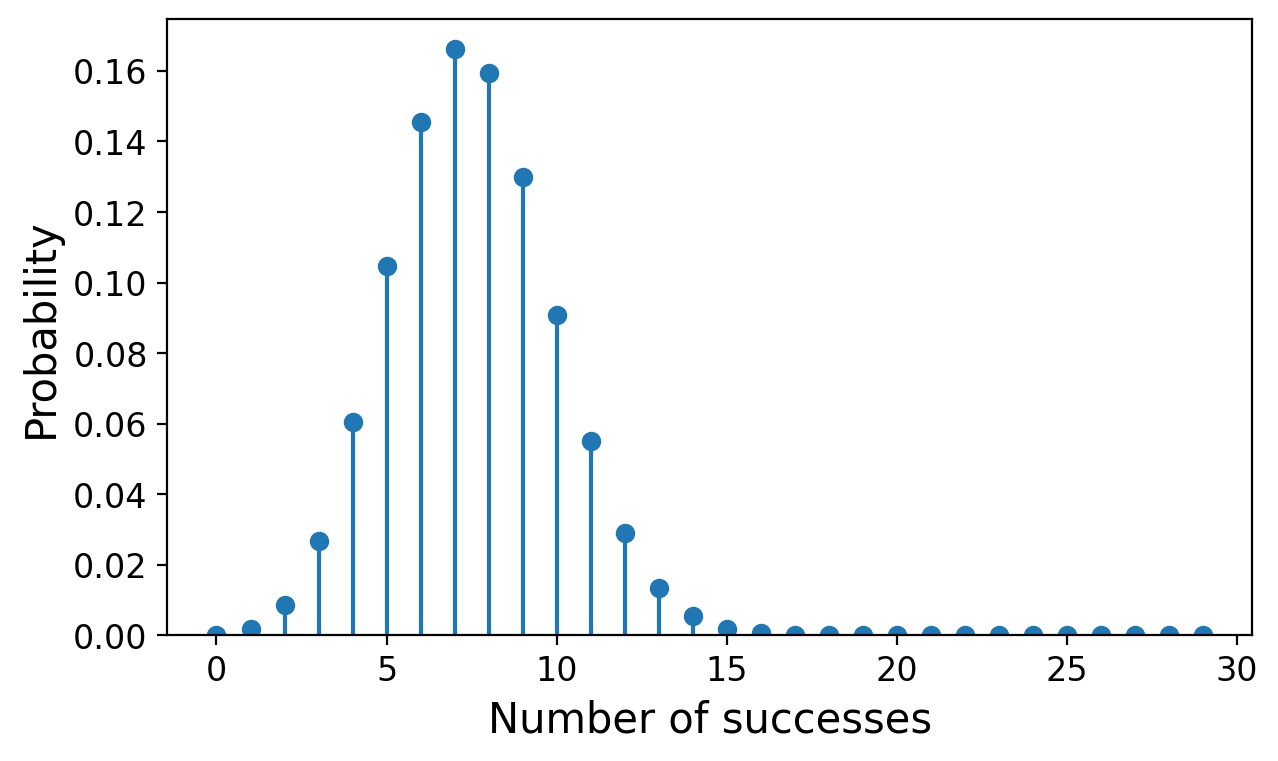

In [6]:
#>>>RUN: L2.1-runcell02

#We are going to use scipy stats package
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

n=30
p=0.25

#let's get the integral of this guy
def ExpectationAndVar(n,p): 
    norm=0
    exp=0
    var=0
    for i0 in range(n):
        norm+=stats.binom.pmf(i0,n,p)
        exp+=i0*stats.binom.pmf(i0,n,p)
    exp=exp/norm
    
    for i0 in range(n):
        pVal=stats.binom.pmf(i0,n,p)
        var+=(i0-exp)**2*pVal
    
    #Print it out
    print("norm:",norm,"expectation:",exp,"Var:",var/norm)

    #Now let's check with the expectation
    print("norm: 1.000000, expectation:",n*p,"Var:",n*p*(1-p))

ExpectationAndVar(n,p)

#Scipy has a binomial, but since this is a discrete distribution we use pmf (probability mass function) rather than pdf
k=np.arange(0,n)
binomial=stats.binom.pmf(k,n,p)

plt.plot(k,binomial,'o')
plt.vlines(k,0, binomial)
plt.ylim(bottom=0)

plt.xlabel("Number of successes")
plt.ylabel("Probability")
plt.show()

<a name='exercises_2_1'></a>     

| [Top](#section_2_0) | [Restart Section](#section_2_1) | [Next Section](#section_2_2) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-2.1.1: Probability as a Function of Coin Fairness</span>

In order to answer this question, plot the probability of flipping a coin 10 times and observing 3 heads, for varying "coin fairness." In other words, as a function of probability $p$ (i.e., the probability $p$ of getting a heads is varying).


<u>Hint:</u> Use the previously defined function `prob(p=0.5,nheads=3,ntotal=10)` and vary `p`, or use the built-in function `stats.binom.pmf(k,n,p)`, defined <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html" target="_blank">here</a>.


As the probability $p$ varies from 0 to 1, which of the following correctly describes the behavior? The probability of observing 3 head out of 10 flips...

- keeps increasing to a value of 1 when p=1
- keeps decreasing to a value of 0 when p=1
- increases from 0 at p=0 to a maximum value, then decreases to 0 at p=1
- maintains a constant value for all p

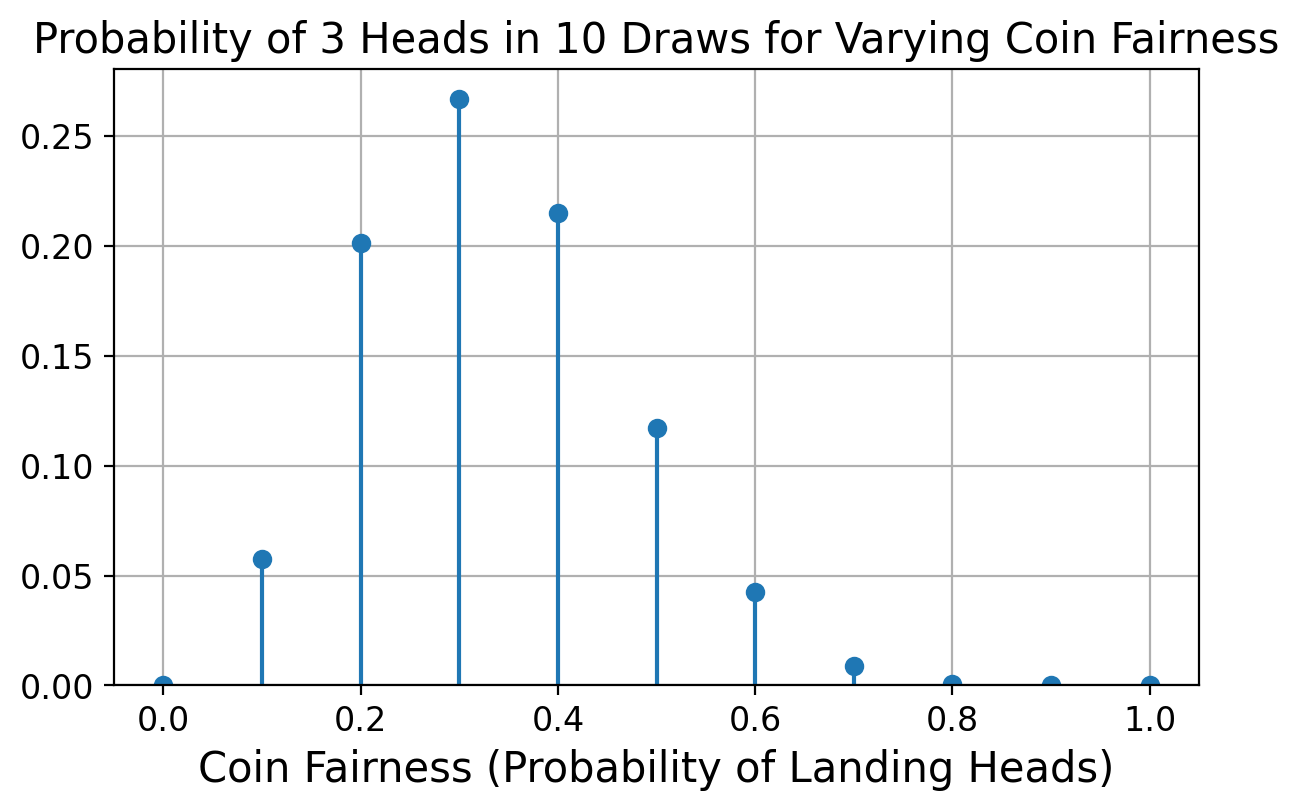

In [10]:
#>>>EXERCISE: L2.1.1
# Use this cell for drafting your solution (if desired)

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

#for p=0.5, what is the probability of 3 heads out of 10 draws?
def prob(p=0.5,nheads=3,ntotal=10):
    #YOUR CODE HERE
    return ###


def plot_prob(x):
    #plotting-------------------
    #plot data
    ydata = prob(p=x,nheads=3,ntotal=10)
    plt.plot(x, ydata, 'o')
    plt.vlines(x,0, ydata)
    plt.ylim(bottom=0)

    #plot labels and style
    plt.title('Probability of 3 Heads in 10 Draws for Varying Coin Fairness', fontsize=15)
    #plt.legend(loc='lower right', fontsize = 12)
    plt.xlabel('Coin Fairness (Probability of Landing Heads)', fontsize=15) #Label x

    # changing the fontsize of ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # a grid
    plt.grid()
    plt.show()
    
    
prob_vals = np.linspace(0,1,11)
plot_prob(prob_vals)

In [ ]:
#>>>SOLUTION: L2.1.1

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

#for p=0.5, what is the probability of 3 heads out of 10 draws?
def prob(p=0.5,nheads=3,ntotal=10):
    pheads=np.power(p,nheads)
    ptails=np.power(1-p,ntotal-nheads)
    combos=comb(ntotal,nheads)
    return combos*ptails*pheads


def plot_prob(x):
    #plotting-------------------
    #plot data
    ydata = prob(p=x,nheads=3,ntotal=10)
    plt.plot(x, ydata, 'o')
    plt.vlines(x,0, ydata)
    plt.ylim(bottom=0)

    #plot labels and style
    plt.title('Probability of 3 Heads in 10 Draws for Varying Coin Fairness', fontsize=15)
    #plt.legend(loc='lower right', fontsize = 12)
    plt.xlabel('Coin Fairness (Probability of Landing Heads)', fontsize=15) #Label x

    # changing the fontsize of ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # a grid
    plt.grid()
    plt.show()
    
    
prob_vals = np.linspace(0,1,11)
plot_prob(prob_vals)

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">
        
**SOLUTION:**
    
increases from from 0 at p=0 to a maximum value, then decreases to 0 at p=1
    
**EXPLANATION:**
    
Run code to observe this effect:
    
<pre>
import numpy as np
from scipy.special import comb

#for p=0.5, what is the probabiity of 3 heads out of 10 draws?
def prob(p=0.5,nheads=3,ntotal=10):
    pheads=np.power(p,nheads)
    ptails=np.power(1-p,ntotal-nheads)
    combos=comb(ntotal,nheads)
    return combos*ptails*pheads


def plot_prob(x):
    #plotting-------------------
    #plot data
    ydata = prob(p=x,nheads=3,ntotal=10)
    plt.plot(x, ydata, 'o')
    plt.vlines(x,0, ydata)
    plt.ylim(bottom=0)

    #plot labels and style
    plt.title('Probability of 3 Heads in 10 Draws for Varying Coin Fairness', fontsize=15)
    #plt.legend(loc='lower right', fontsize = 12)
    plt.xlabel('Coin Fairness (Probability of Landing Heads)', fontsize=15) #Label x

    # changing the fontsize of ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # a grid
    plt.grid()
    plt.show()
    
    
prob_vals = np.linspace(0,1,11)
plot_prob(prob_vals)
</pre>
    
</div>


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-2.1.2: Rolling a Die</span>

Now, instead of flipping a coin, consider rolling a die 10 times. If the die lands on 6, we consider the trial a success. If the die lands on anything other than 6, we consider the trial a failure. Using the formulae for expectation and variance that we previously defined, calculate the expectation and variance of the binomial distribution related to these criteria.

Enter your answer as a list of numbers with precision 1e-2: `[expectation, variance]`

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">
        
**SOLUTION:**
    
<pre>
[1.667,1.389]
</pre>

**EXPLANATION:**
    
The probability of a trial being a success is p=1/6, and we consider n=10 trials. The norm is 1, the expectation is `n*p=1.67`, and the variance is `n*p*(1-p)=1.39`.
    
</div>


>#### Follow-up 2.1.2a (ungraded)
>    
>Plot the binomial distribution of these trials, and calculate the norm (which should be 1), expectation, and variance. Use the starting code below.

In [ ]:
#>>>FOLLOW-UP: L2.1.2a
# Use this cell for drafting your solution (if desired)

#Follow example given in L2.1
import scipy.stats as stats
import matplotlib.pyplot as plt

n=10
p=1/6

#use pmf rather than pdf
k=np.arange(0,n)
binomial=stats.binom.pmf(k,n,p)


def get_binom_integral(n,p):
    #get the integral
    ##########
    #YOUR CODE HERE
    ##########
    return norm, exp, pVal, var

norm, exp, pVal, var = get_binom_integral(n,p)

#print
print("norm:",norm,"expectation:",exp/norm,", Var:",var/norm)

#check
print("norm: 1.000000, expectation:",n*p,", Var:",n*p*(1-p))

    
plt.plot(k,binomial,'o')
plt.vlines(k,0, binomial)
plt.ylim(bottom=0)

plt.xlabel("Number of successes")
plt.ylabel("Probability")
plt.show()

In [ ]:
#>>>SOLUTION: L2.1.2a


#Follow example given in L2.1
import scipy.stats as stats
import matplotlib.pyplot as plt

n=10
p=1/6

#use pmf rather than pdf
k=np.arange(0,n)
binomial=stats.binom.pmf(k,n,p)


def get_binom_integral(n,p):
    #get the integral
    norm=0
    exp=0
    var=0

    for i0 in range(n):
        norm+=stats.binom.pmf(i0,n,p)
        exp+=i0*stats.binom.pmf(i0,n,p)

    for i0 in range(n):
        pVal=stats.binom.pmf(i0,n,p)
        var+=(i0-exp/norm)*(i0-exp/norm)*pVal
        
    return norm, exp, pVal, var

norm, exp, pVal, var = get_binom_integral(n,p)


#print
print("norm:",norm,"expectation:",exp/norm,", Var:",var/norm)

#check
print("norm: 1.000000, expectation:",n*p,", Var:",n*p*(1-p))

    
plt.plot(k,binomial,'o')
plt.vlines(k,0, binomial)
plt.ylim(bottom=0)

plt.xlabel("Number of successes")
plt.ylabel("Probability")
plt.show()



<a name='section_2_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L2.2 Applications Using the Binomial Distribution</h2>  

| [Top](#section_2_0) | [Previous Section](#section_2_1) | [Exercises](#exercises_2_2) | [Next Section](#section_2_3) |


<h3>Overview</h3>

Now, let's do some problems that are more difficult than flipping a coin. Also, let's think about this in a real life setting. Let's say that you are observing <a href="https://en.wikipedia.org/wiki/Fast_radio_burst" target="_blank">fast radio bursts</a> and, based on the Wikipedia page <a href="https://en.wikipedia.org/wiki/List_of_fast_radio_bursts" target="_blank">here</a>, you observe about 19 fast radio bursts per year. What is the probability that you observe 2 fast radio bursts (FRB) within a day of each other? 

The trick to this problem is think of each day as flipping a coin, where the probability of heads is instead the probability of finding a FRB. We can caculate the average probability by noting that over a period 365 days (i.e. 365 experiments), we see 19 FRBs, or in other words:

$$
\begin{eqnarray}
E[f(x;n=365)]&=&np \\
             &=&19 \\
             &=&365\times p \\
            p&=&\frac{19}{365}
\end{eqnarray}
$$


Thus, the probability of $2$ in a row turns out to be 0.3% (see below). Moreover, the probability of 2 observations in 7 days is (see below) 4.3%.


In [11]:
#>>>RUN: L2.2-runcell01

def prob(ndays=2,nobs=2,p=19/(365)):
    return stats.binom.pmf(nobs,ndays,p)

print("2 observations in 2 days:",prob())
print("2 observations in 7 days:",prob(7))
print("19 observations in 365 days:",prob(365,19))


2 observations in 2 days: 0.0027097016325764683
2 observations in 7 days: 0.04355689764465313
19 observations in 365 days: 0.0935904593189704


Now, let's ask an important physics question. Let's say you observed 2 FRBs back to back. Given the probability of this occurence is so low, is something significant happening in the universe? <a href="https://en.wikipedia.org/wiki/Fast_radio_burst#FRB_201124" target="_blank">Read here.</a>

Secondly, why is the probability of 19 observations in 365 days so low? (only 10%). To understand this let's make a plot. 


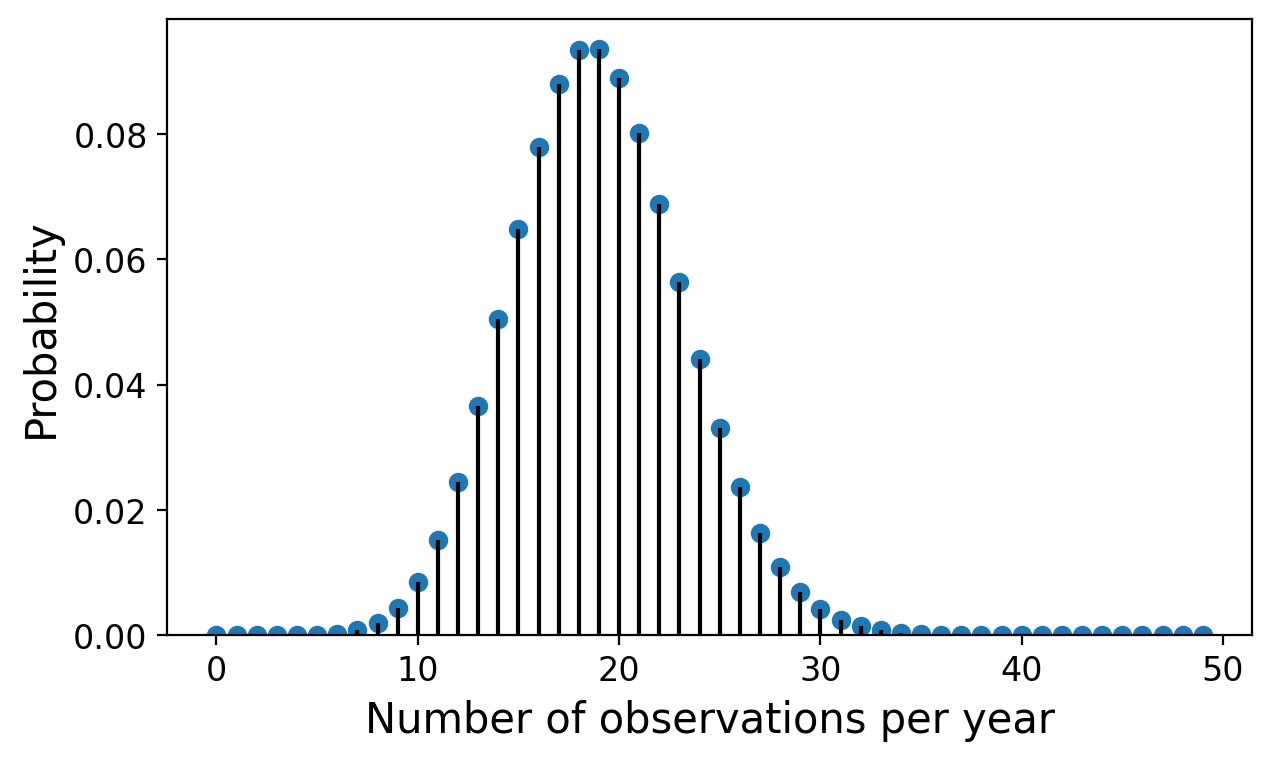

In [12]:
#>>>RUN: L2.2-runcell02

p=19/365
n=365
k=np.arange(0,50)
binomial=stats.binom.pmf(k,n,p)

def plotBinomial(iX,iBinomial,label='Binomial',color='black'):
    plt.plot(iX,iBinomial,'o')
    plt.vlines(iX,0, iBinomial,label=label,color=color)
    plt.ylim(bottom=0)
    plt.xlabel("Number of observations per year")
    plt.ylabel("Probability")

plotBinomial(k,binomial)


Getting exactly 19 observations is unlikely because there is variation. What we really want to do is integrate the number of observations that are either greater or less than 19. This is the cumulative distribution function. 

$$
\begin{equation}
\mathrm{CDF}(\mathrm{binomial}(x)) = \int_x^{\infty} \mathrm{binomial}(u;p,k) du 
\end{equation}
$$

The nice thing is that this is all built into our statistics code. Let's plot it!


p-value at 19 obs: 0.5606290918165593
p-value at 1  obs: 7.063101787904396e-08


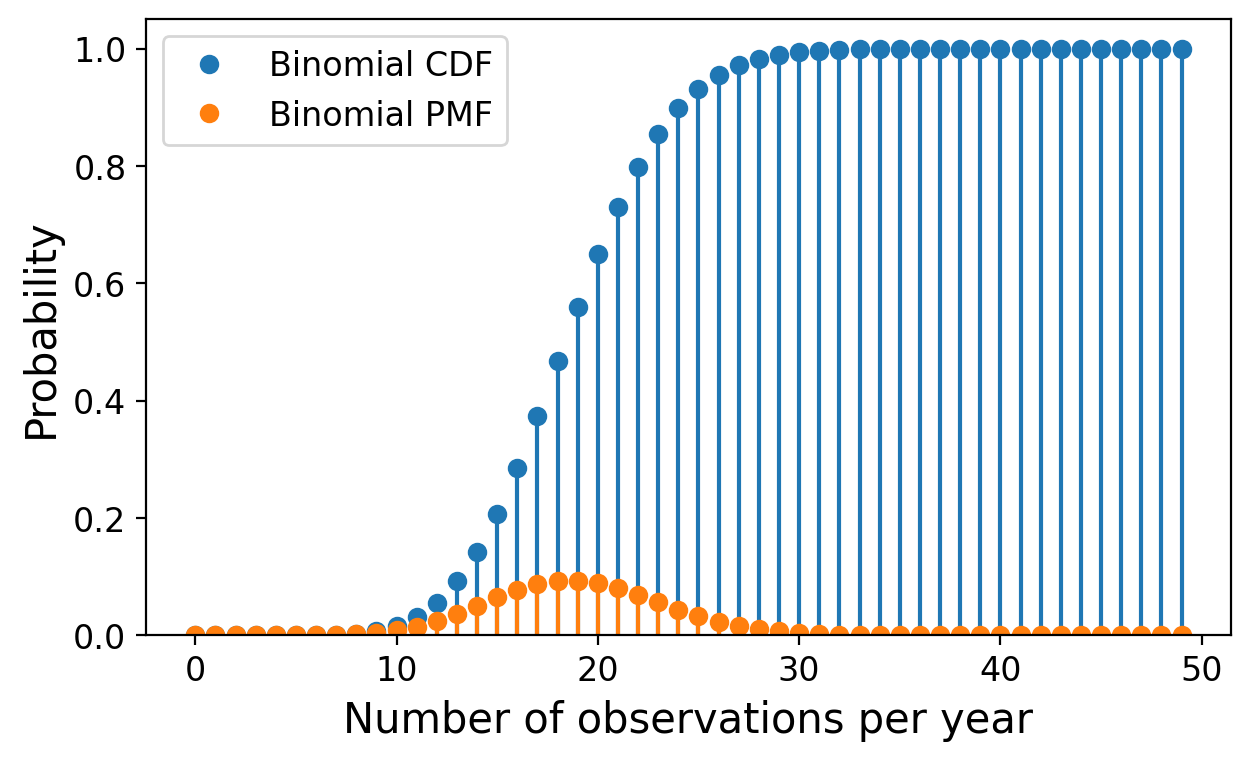

mean: 18.99999998055731 stddev: 4.243931938945088


In [14]:
#>>>RUN: L2.2-runcell03

p=19/365
n=365
k=np.arange(0,50)
binomial=stats.binom.pmf(k,n,p)
binomialcdf=stats.binom.cdf(k,n,p)
print("p-value at 19 obs:",stats.binom.cdf(19,n,p))
print("p-value at 1  obs:",stats.binom.cdf(1,n,p))

plt.plot(k,binomialcdf,'o', label="Binomial CDF")
plt.vlines(k,0, binomialcdf, color=plt.gca().lines[-1].get_color())
plt.ylim(bottom=0)

plt.plot(k,binomial,'o', label="Binomial PMF")
plt.vlines(k,0, binomial, color=plt.gca().lines[-1].get_color())
plt.ylim(bottom=0)

plt.xlabel("Number of observations per year")
plt.ylabel("Probability")
plt.legend()
plt.show()


mean = np.average(k, weights=binomial)
variance = np.average((k-mean)**2, weights=binomial)
print("mean:",mean,"stddev:",np.sqrt(variance))



So, now we see clearly that the CDF is at approximately 50% for 19 observations. It's not exactly 50% for the simple fact that this is a discrete distribution. However, the expectation will be at exactly 19. 

<a name='exercises_2_2'></a>     

| [Top](#section_2_0) | [Restart Section](#section_2_2) | [Next Section](#section_2_3) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-2.2.1: Rate of GW Detections</span>

Let's do another related problem. With the current rate of gravitational wave (GW) detections, we observe a GW once per week. What is the probability of 3 or more gravitational waves being detected in one week? Use the starting code below to compute your answer.

In [ ]:
#>>>EXERCISE: L2.2.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

import numpy as np
import scipy.stats as stats

def plotBinomial(iX,iBinomial,label='Binomial',color='black'):
    plt.plot(iX,iBinomial,'o')
    plt.vlines(iX,0, iBinomial,label=label,color=color)
    plt.ylim(bottom=0)
    plt.xlabel("Number of observations per year")
    plt.ylabel("Probability")

n = #YOUR CODE HERE
p = #YOUR CODE HERE
k = #YOUR CODE HERE

binomial=stats.binom.pmf(k,n,p)
total1=0
for i0 in range(len(k)):
    if k[i0] > 2:
        total1+= binomial[i0]

print("binomial:",total1)

plotBinomial(k,binomial)
plt.show()

In [ ]:
#>>>SOLUTION: L2.2.1

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def plotBinomial(iX,iBinomial,label='Binomial',color='black'):
    plt.plot(iX,iBinomial,'o')
    plt.vlines(iX,0, iBinomial,label=label,color=color)
    plt.ylim(bottom=0)
    plt.xlabel("Number of observations per year")
    plt.ylabel("Probability")

n=7.
p=1./7.
k = np.arange(0,10)

binomial=stats.binom.pmf(k,n,p)
total1=0
for i0 in range(len(k)):
    if k[i0] > 2:
        total1+= binomial[i0]

print("binomial:",total1)

plotBinomial(k,binomial)
plt.show()

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
0.06523
</pre>
        
**EXPLANATION:**
    
Use the following code to make this calculation:

<pre>
import scipy.stats as stats
#solution
n=7.
p=1./7.
k=np.arange(0,10)
binomial=stats.binom.pmf(k,n,p)
total1=0
for i0 in range(len(k)):
    if k[i0] > 2:
        total1+= binomial[i0]
print("binomial:",total1)
</pre>
    
</div>


>#### Follow-up 2.2.1a (ungraded)
>  
>Try plotting this distribution! Additionally, what is the probability distribution for the number of GW events observed over a whole year, and what is the mean and variance of this distribution? Use the starting code below.

In [ ]:
#>>>FOLLOW-UP: L2.2.1a
# Use this cell for drafting your solution (if desired)

import scipy.stats as stats

def plotBinomial(iX,iBinomial,label='Binomial',color='black'):
    plt.plot(iX,iBinomial,'o')
    plt.vlines(iX,0, iBinomial,label=label,color=color)
    plt.ylim(bottom=0)
    plt.xlabel("Number of observations per year")
    plt.ylabel("Probability")



#now what about for GWs in a year
n = #YOUR CODE HERE
p = #YOUR CODE HERE
k = #YOUR CODE HERE

binomial=stats.binom.pmf(k,n,p)

plotBinomial(k,binomial)
plt.show()

average  = np.average(k, weights=binomial)
variance = np.average((k-average)**2, weights=binomial)
print("mean:",average,"stddev:",np.sqrt(variance))



In [ ]:
#>>>SOLUTION: L2.2.1a

import scipy.stats as stats

def plotBinomial(iX,iBinomial,label='Binomial',color='black'):
    plt.plot(iX,iBinomial,'o')
    plt.vlines(iX,0, iBinomial,label=label,color=color)
    plt.ylim(bottom=0)
    plt.xlabel("Number of observations per year")
    plt.ylabel("Probability")


#now what about for GWs in a year
n=365. #we don't need to divide by day!
p=1/7.
k=np.arange(0,100)
binomial=stats.binom.pmf(k,n,p)

plotBinomial(k,binomial)
plt.show()

average  = np.average(k, weights=binomial)
variance = np.average((k-average)**2, weights=binomial)
print("mean:",average,"stddev:",np.sqrt(variance))



### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-2.2.2: Probability of Coin Flips</span>

What is the probability of 2 heads in 10 coin flips, given a 50% probability for heads? What about if there is a 10% probability for heads?

Enter your answer as a list of two numbers, where the numbers correspond to probabilities: `[prob with p=50%, prob with p=10%]`

Use the starting code below to aid your calculation.

In [ ]:
#>>>EXERCISE: L2.2.2
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def prob(nheads=2,nflips=10,p=0.5):
    return #your code here

print("2 heads in 10 flips:",prob())
print("2 heads in 10 flips:",prob(p=1/10))

In [ ]:
#>>>SOLUTION: L2.2.2

def prob(nheads=2,nflips=10,p=0.5):
    return stats.binom.pmf(nheads,nflips,p)

print("2 heads in 10 flips:",prob())
print("2 heads in 10 flips:",prob(p=1/10))

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
[0.0439,0.1937]
</pre>
        
**EXPLANATION:**
        
To solve the problem, we simply ran a binomial distribution for both scenerios.
    
Use the following code to make this calculation:

<pre>
def prob(nheads=2,nflips=10,p=0.5):
    return stats.binom.pmf(nheads,nflips,p)

print("2 heads in 10 flips:",prob())
print("2 heads in 10 flips:",prob(p=1/10))
</pre>

    
</div>


>#### Follow-up 2.2.2a (ungraded)
> 
>Given the situation described in the exercise above (2 heads seen in 10 coin flips), how confidently can we conclude that our coin is biased?


<a name='section_2_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L2.3 The Poisson Distribution</h2>  

| [Top](#section_2_0) | [Previous Section](#section_2_2) | [Exercises](#exercises_2_3) | [Next Section](#section_2_4) |


<h3>Overview</h3>

The ugly thing about the binomial distribution is that it has these damn factorials. One way to get rid of the factorials is to do an approximation of the binomial distribution. We can define this by taking a limit over the number of experiments going to infinity $n\rightarrow\infty$. To do this, we first define $\lambda$ as:

$$
\begin{equation}
\lambda = \lim_{n\rightarrow\infty} np \rightarrow p=\frac{\lambda}{n} \\
\end{equation}
$$

Now, in this limiting case, we can replace the binomial distribution with an approximate form that has fewer factorials:


$$
\begin{eqnarray}
\lim_{n\rightarrow\infty}\frac{n!}{m!(n-m)!}p^{m}(1-p)^{n} & = & \frac{n(n-1)...(n-m+1)}{m!}\left(\frac{\lambda}{n}\right)^{m}\left(1-\frac{\lambda}{n}\right)^{n} \\
&\approx&\frac{n^m}{m!}\frac{\lambda^{m}}{n^{m}}\left(1-\frac{\lambda}{n}\right)^{n} \\
&\approx&\frac{\lambda^{m}}{m!}e^{-\lambda} \\
f(m;\lambda=np) & = & \frac{\lambda^{m}}{m!}e^{-\lambda}
\end{eqnarray}
$$

This form is known as the Poisson distribution, and is achieved by taking the binomial distribution to the large $n$ limit. We still have a pesky factorial, but one factorial is better than three factorials. 

We can treat the Poisson distribution just like the binomial distribution, using something similar to the computations done previously for the mean and variance (of $n\rightarrow\infty$ experiments sampling a Poisson distribution, noting that $p\rightarrow0$ in the large $n$ limit):


$$
\begin{equation}
E[f(x)]=\lambda \\
V[f(x)]=\lambda
\end{equation}
$$

What is most important from this observation is that the standard deviation of the distribution goes as the $\sqrt{\lambda}$ or the square root of the mean of the distribution. This will play a critical role going forward. 

<br>
<!--end-block-->


<h3>Comparison</h3>

Now, let's see how a Poisson compares to a binomial in our previous plots. Let's use our FRB example $p=19/365$. Alternatively, let's also consider the probability of a sunny day in Boston $p=200/365$.

<br>
<!--end-block-->


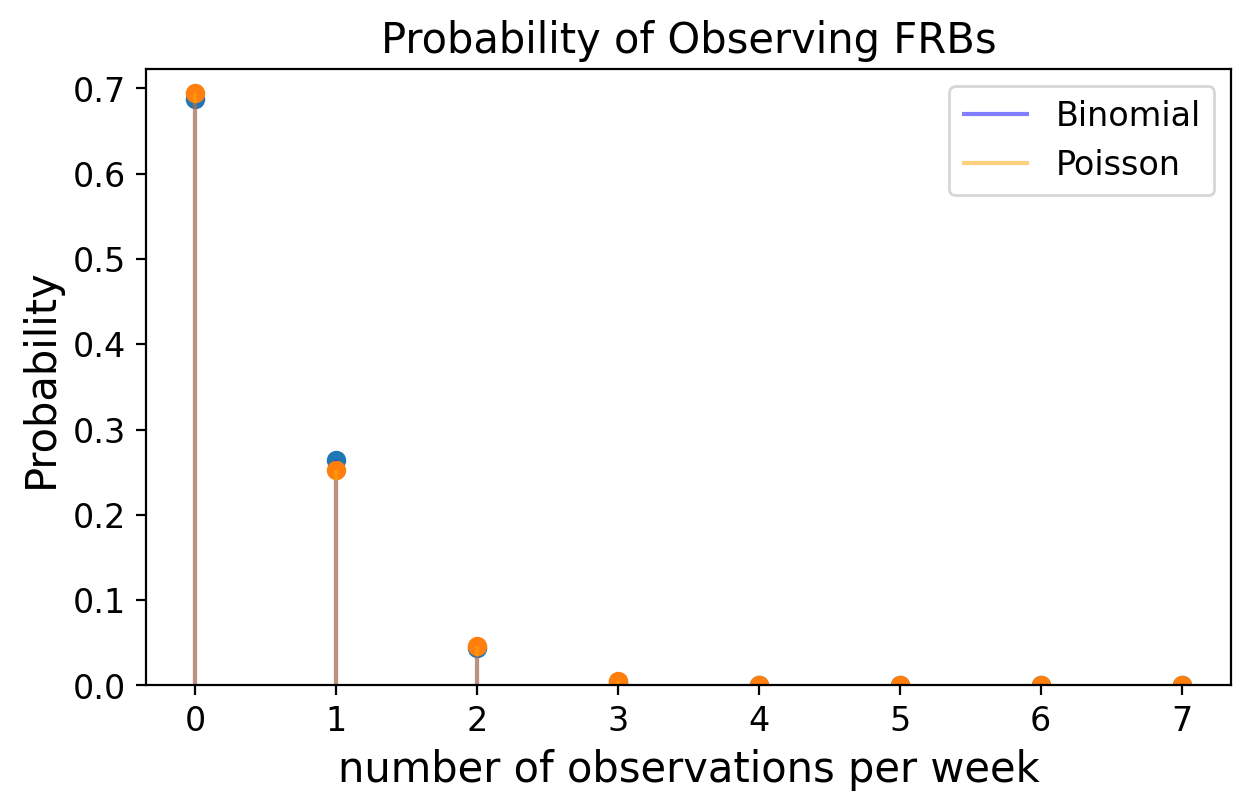

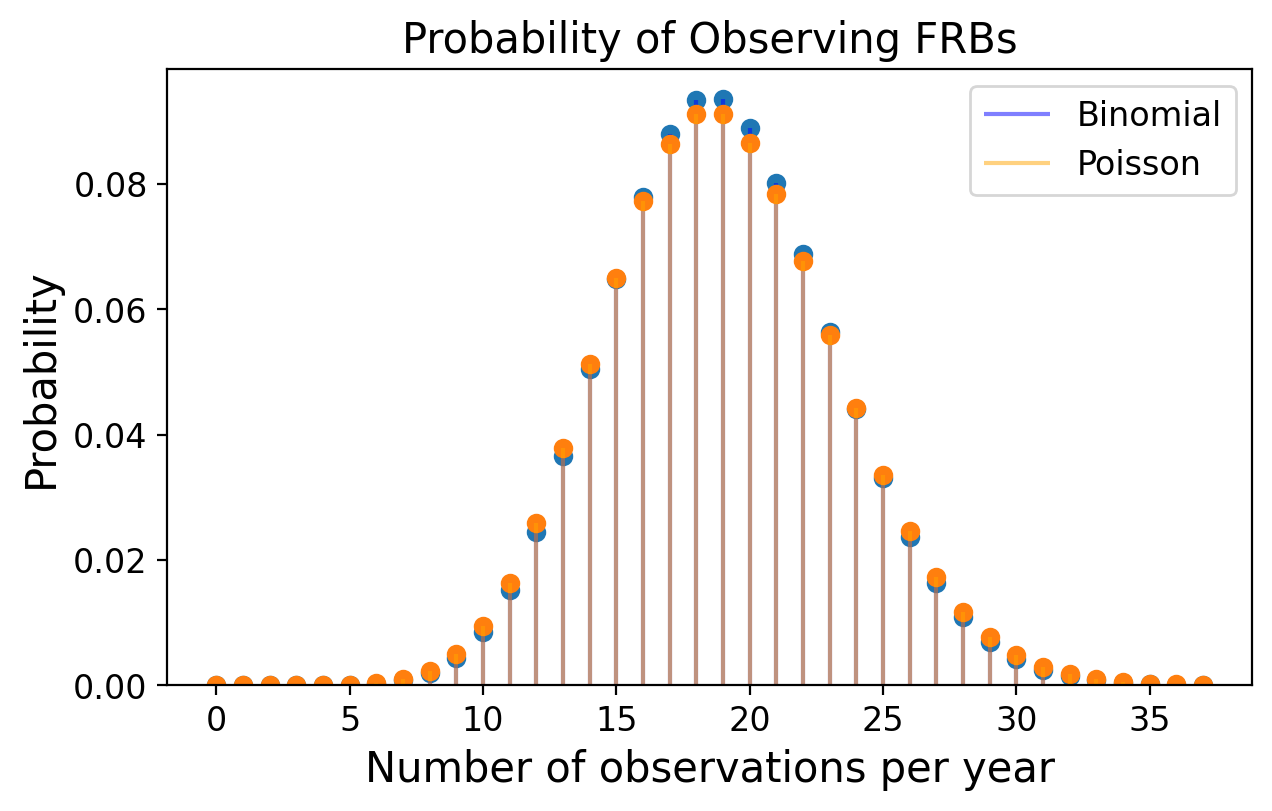

Yearly Binomial mean: 18.999062127754538 stddev: 4.24183772350952
Yearly Poisson mean: 18.99840654567745 stddev: 4.355424414310838



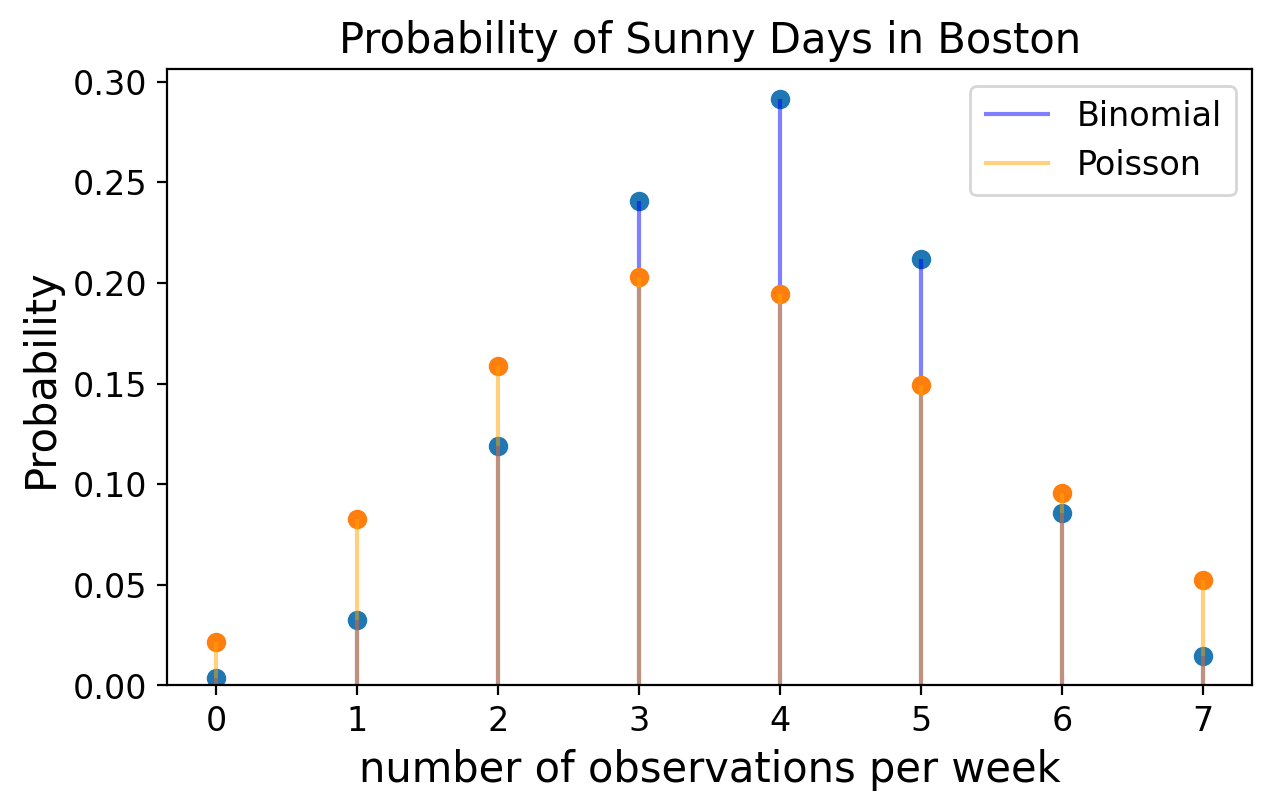

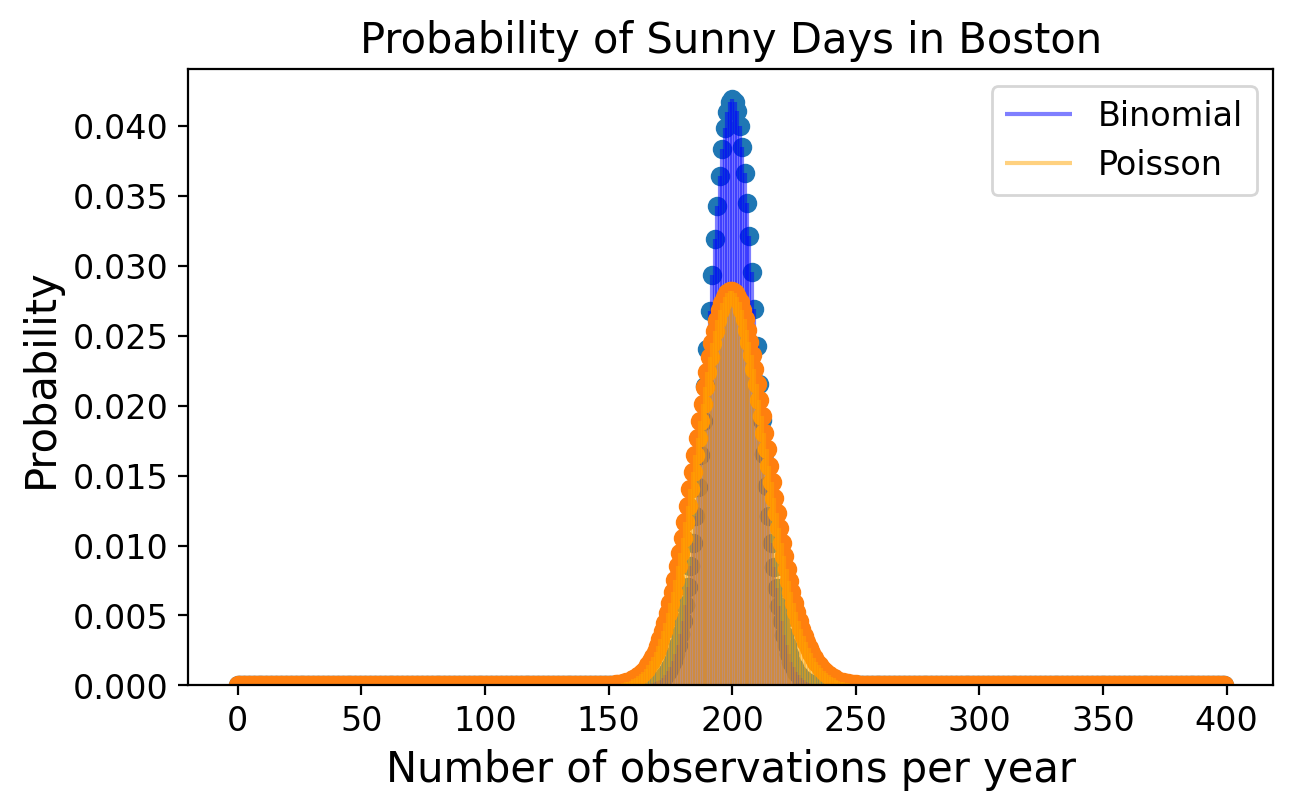

Yearly Binomial mean: 200.0 stddev: 9.508467747440154
Yearly Poisson mean: 199.9999999999999 stddev: 14.1421356237309



In [18]:
#>>>RUN: L2.3-runcell01
def plotBinomial(iX,iBinomial,label='Binomial',color='black'):
    plt.plot(iX,iBinomial,'o')
    plt.vlines(iX,0, iBinomial,label=label,color=color,alpha=0.5)
    plt.ylim(bottom=0)
    plt.xlabel("Number of observations per year")
    plt.ylabel("Probability")

    
#Let's make a function for plotting
def plotWeekYear(p, title=''):
    #Week comparison
    n=7
    k=np.arange(0,n+1)
    binomial_week=stats.binom.pmf(k,n,p)
    poisson_week=stats.poisson.pmf(k,n*p)#note we give lambda=n*p
    #plotting code
    plt.title(title)
    plotBinomial(k,binomial_week,label='Binomial',color='blue')
    plotBinomial(k,poisson_week,label='Poisson',color='orange')
    plt.legend(loc='upper right')
    plt.xlabel('number of observations per week')
    plt.show()

    n=365
    k=np.arange(0,2*p*n)
    binomial_year=stats.binom.pmf(k,n,p)
    poisson_year=stats.poisson.pmf(k,n*p)#note we give lambda=n*p
    #plotting code
    plt.title(title)
    plotBinomial(k,binomial_year,label='Binomial',color='blue')
    plotBinomial(k,poisson_year,label='Poisson',color='orange')
    plt.legend(loc='upper right')
    plt.show()

    average  = np.average(k, weights=binomial_year)
    variance = np.average((k-average)**2, weights=binomial_year)
    print("Yearly Binomial mean:",average,"stddev:",np.sqrt(variance))
    
    average  = np.average(k, weights=poisson_year)
    variance = np.average((k-average)**2, weights=poisson_year)
    print("Yearly Poisson mean:",average,"stddev:",np.sqrt(variance))
    print()

    
#First FRBs
p=19/365
plotWeekYear(p, title='Probability of Observing FRBs')

#Now let's do sunny days
p=200/365
plotWeekYear(p, title='Probability of Sunny Days in Boston')


So, we see that the Poisson approximation is really quite good for the case where the $p\ll1$. However, when $p$ is large (like the number of sunny days in the example above) and the number of events is small, the Poisson result can be quite far off. Just look at the number of sunny days per week. The binomial distributions gives about two percent probability of having one sunny day in a week, vs. nearly eight percent probability given by the Poisson distribution. Looking at the number of observations per year, clearly there is also a dramatic difference in the width of the distributions with $p$ is large.

Which one of these distributions is correct for weather? (Answer: Neither are good because the weather from yesterday gives you some information about what will happen today, it's not a random process on a day-to-day level)

<a name='exercises_2_3'></a>     

| [Top](#section_2_0) | [Restart Section](#section_2_3) | [Next Section](#section_2_4) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-2.3.1: GW Detection Timescale Comparison</span>

With the current rate of Gravitational wave detections, we observe a GW once per week (one way to phrase this is that the probability of a GW on a given day is 1/7). Compare the Poisson and binomial distributions for gravitational wave observations over the period of a week vs. a year. **Hint: the previously defined function `plotWeekYear` may be useful.**

Can GW detections be reasonably approximated by a Poisson process?

In [ ]:
#>>>EXERCISE: L2.3.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

pass

In [ ]:
#>>>SOLUTION: L2.3.1

#Answer
#Now with the current rate of Gravitational wave detection we observe a GW once per week
#One way to phrase this is that the probability of a GW on a day is 1/7, and we have 7 days in a week

#Use the previously defined function
def plotWeekYear(p, title=''):
    #Week comparison
    n=7
    k=np.arange(0,n+1)
    binomial_week=stats.binom.pmf(k,n,p)
    poisson_week=stats.poisson.pmf(k,n*p)#note we give lambda=n*p
    plt.title(title)
    plotBinomial(k,binomial_week,label='Binomial',color='blue')
    plotBinomial(k,poisson_week,label='Poisson',color='orange')
    plt.legend(loc='upper right')
    plt.xlabel('number of observations per week')
    plt.show()

    average  = np.average(k, weights=binomial_week)
    variance = np.average((k-average)**2, weights=binomial_week)
    print("Weekly Binomial mean:",average,"stddev:",np.sqrt(variance))
    
    average  = np.average(k, weights=poisson_week)
    variance = np.average((k-average)**2, weights=poisson_week)
    print("Weekly Poisson mean:",average,"stddev:",np.sqrt(variance))


    n=365
    k=np.arange(0,2*p*n)
    binomial_year=stats.binom.pmf(k,n,p)
    poisson_year=stats.poisson.pmf(k,n*p)#note we give lambda=n*p
    plt.title(title)
    plotBinomial(k,binomial_year,label='Binomial',color='blue')
    plotBinomial(k,poisson_year,label='Poisson',color='orange')
    plt.legend(loc='upper right')
    plt.show()

    average  = np.average(k, weights=binomial_year)
    variance = np.average((k-average)**2, weights=binomial_year)
    print("Yearly Binomial mean:",average,"stddev:",np.sqrt(variance))
    
    average  = np.average(k, weights=poisson_year)
    variance = np.average((k-average)**2, weights=poisson_year)
    print("Yearly Poisson mean:",average,"stddev:",np.sqrt(variance))

    
p=1./7.
plotWeekYear(p, 'Probability of Observing GW Event')

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

        
**EXPLANATION:**
        
Yes, since $p$ is relatively low. The distributions look approximately the same.

</div>


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-2.3.2: Fraction of GWs per Week</span>

If more GWs are detected per week, on average, will a Poisson distribution be a BETTER fit for the distribution of GW observations or a WORSE fit?

<a name='section_2_4'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L2.4 Poisson Distribution Continued</h2>  

| [Top](#section_2_0) | [Previous Section](#section_2_3) | [Exercises](#exercises_2_4) | [Next Section](#section_2_5) |


<h3>Overview</h3>

Now, why are we spending so much time on Poisson distributions? Let's say I have a distribution that is flat and I sampled that distribution 10000 times, and then made a histogram with 100 bins. Let's make a distribution like that!

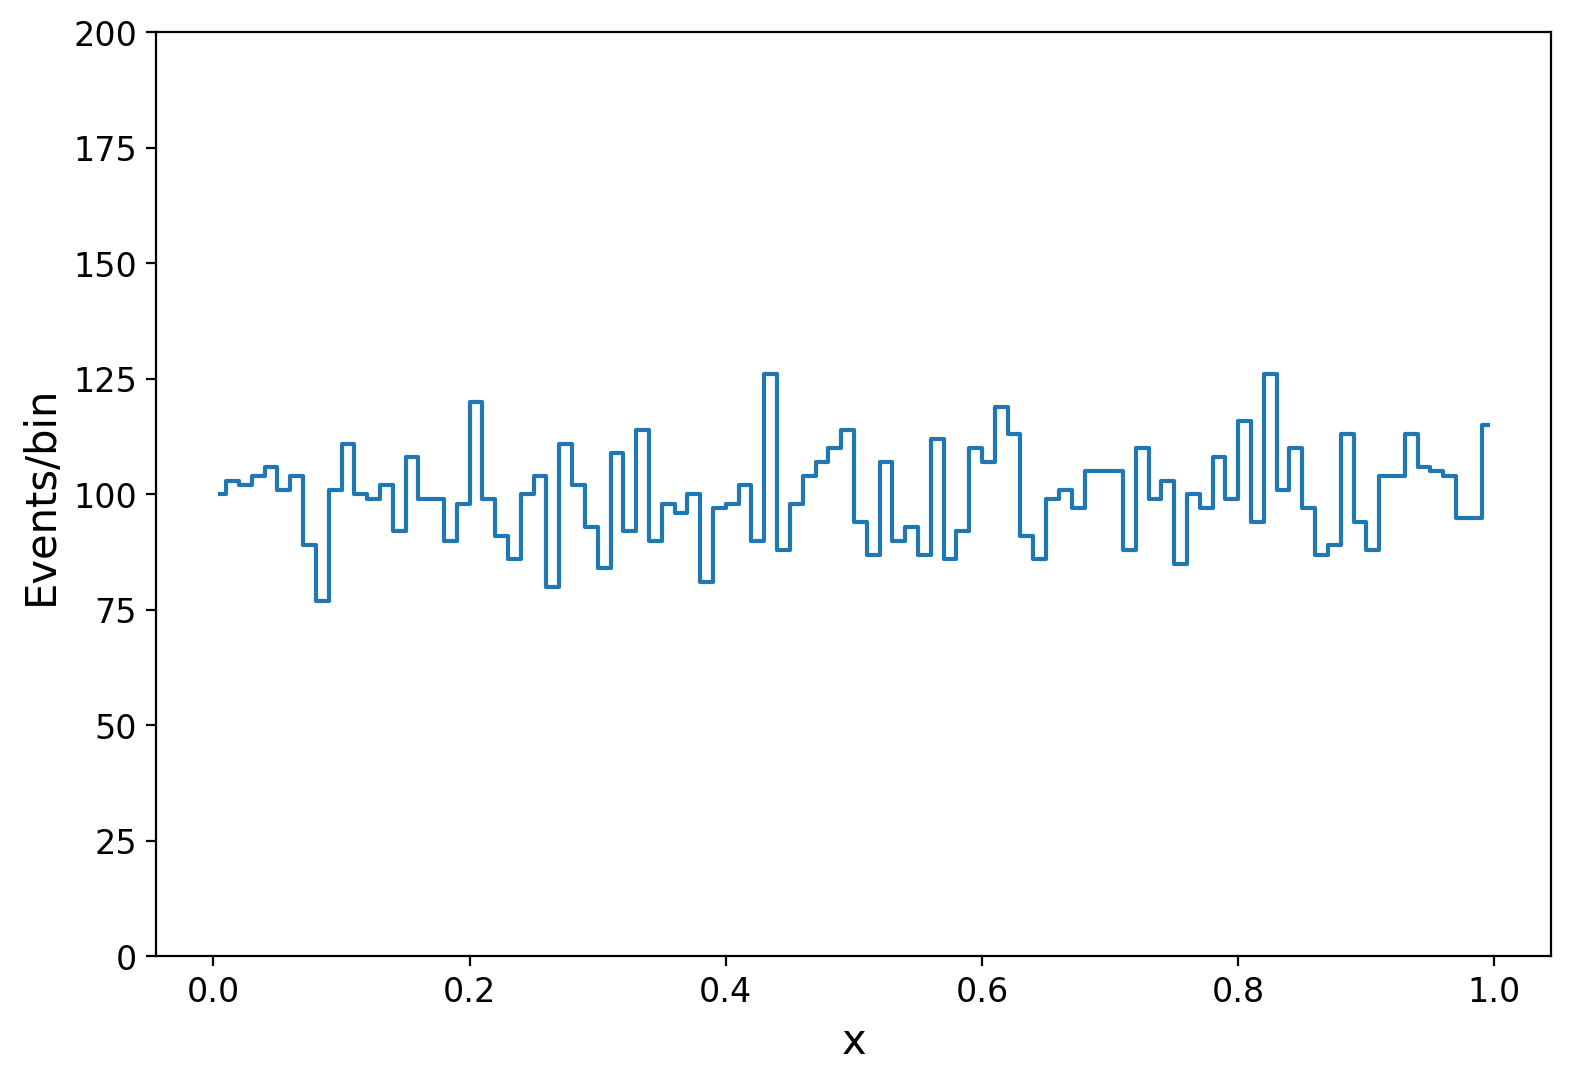

In [19]:
#>>>RUN: L2.4-runcell01

fig, ax = plt.subplots(figsize=(9,6))
N=10000
nbins=100
sample  = np.random.uniform (0,1,N)

def plotHist(iSample,iNBins):
    histy, bin_edges = np.histogram(iSample, bins=iNBins)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    ax.set_ylim([0,2*N/nbins])
    plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
    plt.xlabel("x")
    plt.ylabel("Events/bin")
    plt.show()
    return bin_centers, histy

_,_ = plotHist(sample,nbins)


Each bin in the sampling has a 1/100 probability of being in any one of the respecitve bins. 

Let's look at the mean and variance over the bins. What is the distribution of the variations over these bins? 


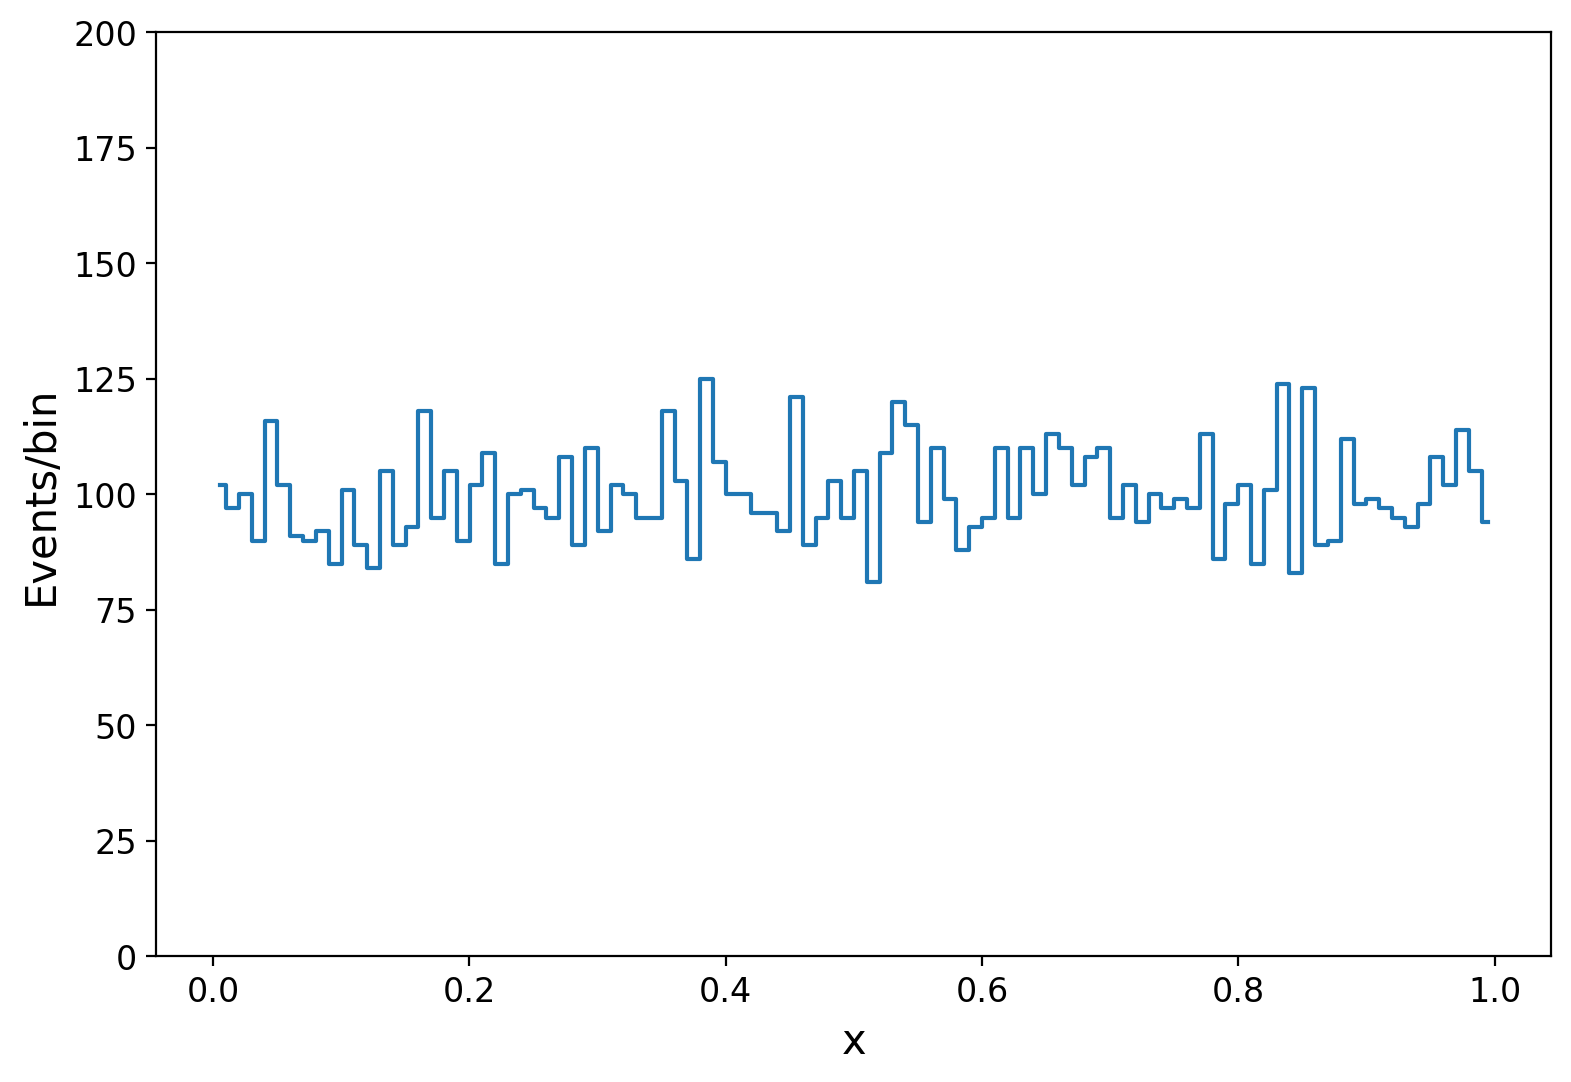

Actual mean: 99.97866666666665 Variance: 94.83474488888888
Poisson mean: 99.99934585710345 Variance: 99.96911275895653


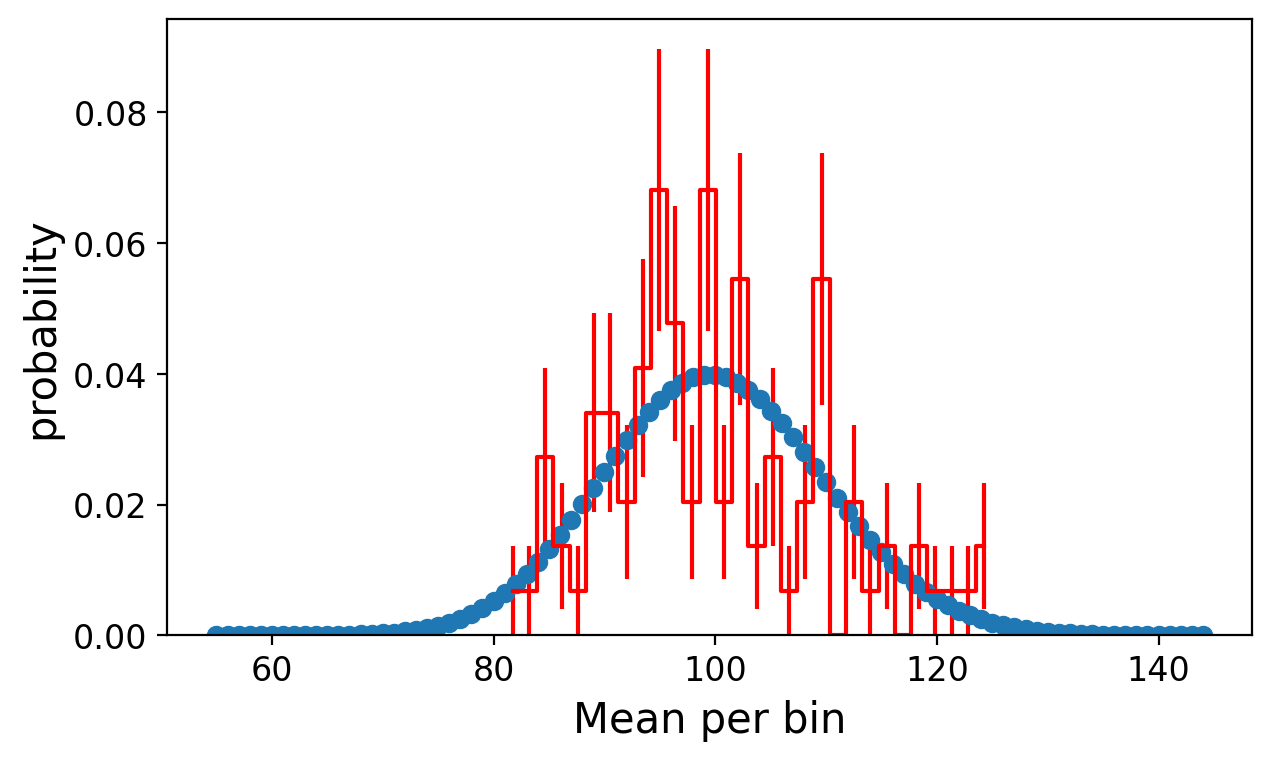

In [21]:
#>>>RUN: L2.4-runcell02

#copy and past above distribution
fig, ax = plt.subplots(figsize=(9,6))
N=10000
#N=1000000 #Try larger N value
nbins=100
sample  = np.random.uniform (0,1,N)
histx, histy = plotHist(sample,nbins)

#code that just makes a histogram and gives error bars on each bin 
def normhist(iVars,iNbins=30,iNormalize=True):
    y0, bin_edges = np.histogram(iVars, bins=iNbins)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    norm0 = 1 
    if iNormalize:
        norm0=len(iVars)*(bin_edges[-1]-bin_edges[0])/iNbins
    plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0, ###<===== Pay attention to the error why is it this way? 
                 drawstyle = 'steps-mid',c='red')
    return bin_centers,y0,bin_edges

#Ok first lets look at the mean and variance across the bins 
residx,residy,_=normhist(histy)
haverage  = np.average(residx, weights=residy)
hvariance = np.average((residx-haverage)**2, weights=residy)
print("Actual mean:",haverage,"Variance:",hvariance) 

#Now lets do this analytically with an Poisson approximation
#Now since we have 100 bins with p=1/100 and we sample 10000 times we have lamb=np= N (1/nbins)
lamb=N/nbins # = n = number experiments * p = (1/nbins) 
k=np.arange(0.55*N/nbins,1.45*N/nbins) 
#k=np.arange(0.85*N/nbins,1.15*N/nbins) #adjust range if using larger N 
poisson=stats.poisson.pmf(k,lamb)#lambda = n * p 
paverage  = np.average(k, weights=poisson)
pvariance = np.average((k-paverage)**2, weights=poisson)
print("Poisson mean:",paverage,"Variance:",pvariance)

plt.plot(k,poisson,'o')
# plt.vlines(k,0, poisson)
plt.ylim(bottom=0)

plt.xlabel("Mean per bin")
plt.ylabel("probability")
plt.show()

It's a Poisson distribution! Now, this brings us to a very important plot. If we have a histogram with $N$ events in a particular bin, what are the fluctuations in that bin? 


If it is Poisson, then the variance is going to be $N$ and the standard deviation is going to be $\sqrt{N}$. As a consequence, we can characterize the fluctuations per bin by the standard deviation. Thus, whenever we have a plot with data and we want to plot the expected fluctuations per bin, we plot the Poisson fluctuations. The previous distribution would thus look like:

9.986987378801604


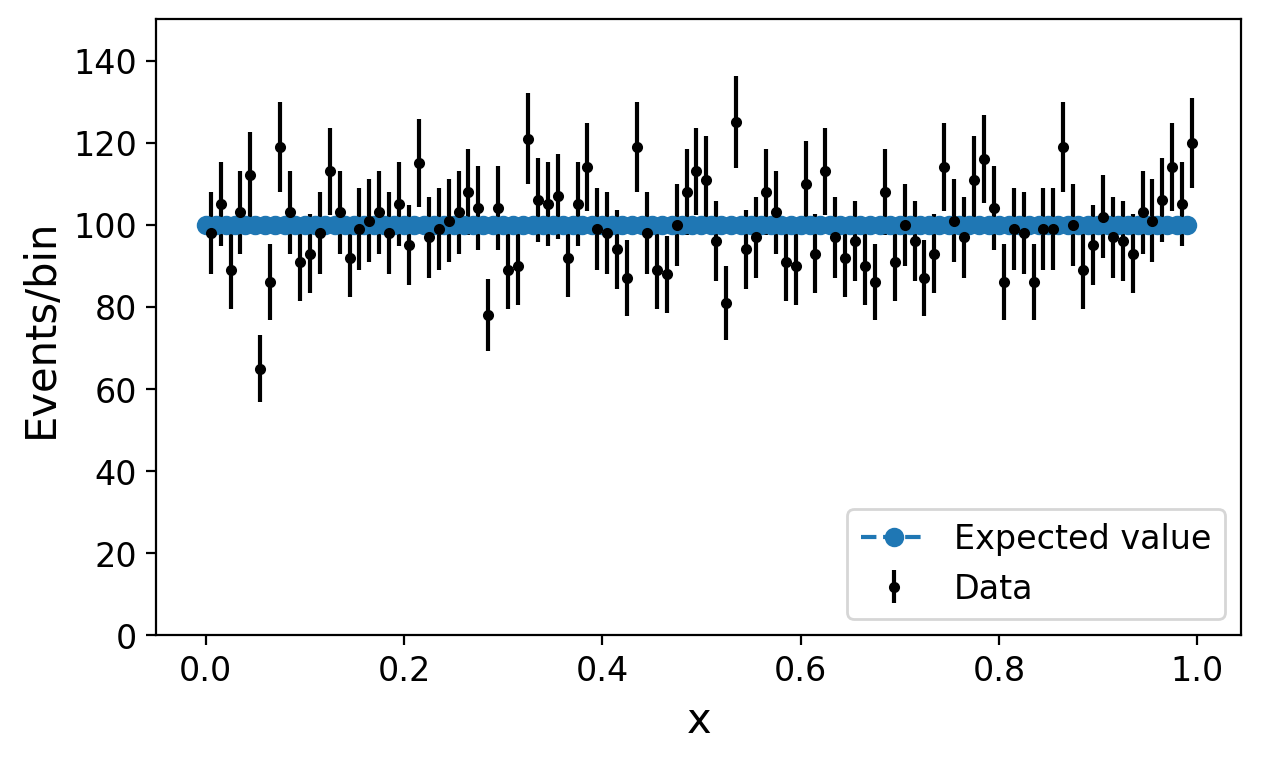

In [22]:
#>>>RUN: L2.4-runcell03

#And so the bins are Poisson fluctuated. This is why when we plot data in a histogram we put error bars 
#Corresponding the Poisson uncertainty in a bin
N=10000
nbins=100
sample  = np.random.uniform (0,1,N)
histy, bin_edges = np.histogram(sample, bins=nbins)
yerr=np.sqrt(histy)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
ax.set_ylim([0,2*N/nbins])

#Here is the command
plt.errorbar(bin_centers,histy,yerr=yerr,marker='.',c='black',linestyle = 'None',label='Data')
print(np.mean(yerr))

k=np.arange(0,1,0.01)
vals=np.full((100),N/nbins)
plt.plot(k,vals,'o--',label="Expected value")
plt.ylim(0,1.5*(N/nbins))
plt.xlabel("x")
plt.ylabel("Events/bin")
plt.legend(loc='lower right')
plt.show()

<a name='exercises_2_4'></a>     

| [Top](#section_2_0) | [Restart Section](#section_2_4) | [Next Section](#section_2_5) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-2.4.1: Calculating Error for a Poisson Distribution</span>

For 100 bins, what is the Poisson error (standard deviation) averaged over all bins for an experiment run 100, 1000, and 10000 times?

Hint: You can use the code below to help calculate the yerr for all bins and then average them yourself.

Enter your answer as a list of numbers rounded to the nearest integer: `[avg(100), avg(1000), avg(10000)]`.

In [ ]:
#>>>EXERCISE: L2.4.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

N=10000 #YOUR CODE HERE [VARY 100, 1000, 10000]
nbins= 100 

sample  = np.random.uniform (0,1,N)
histy, bin_edges = np.histogram(sample, bins=nbins)
yerr=np.sqrt(histy)

#YOUR CODE HERE

In [ ]:
#>>>SOLUTION: L2.4.1

N=10000
nbins=100
sample  = np.random.uniform (0,1,N)
histy, bin_edges = np.histogram(sample, bins=nbins)
yerr=np.sqrt(histy)
print(np.mean(yerr))


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
[1,3,10]
</pre>
        
**EXPLANATION:**
    
The standard deviation of a Poisson distribution is $\sqrt{N}$. Each bin's standard deviation thus becomes $\sqrt{\frac{N}{N_{bin}}}$. 

    
</div>


<a name='section_2_5'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L2.5 The Gaussian Distribution</h2>  

| [Top](#section_2_0) | [Previous Section](#section_2_4) | [Exercises](#exercises_2_5) | [Next Section](#section_2_6) |


<h3>Overview</h3>

The Poisson distribution discussed above is very powerful. However, we will often view it as a subset of the Normal or Gaussian distributions, given by the form: 


$$
\begin{equation}
\mathcal{N}(x,\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}
$$

This distribution has the very important properties that you can derive yourselves: 

$$
\begin{equation}
E[N(x,\mu,\sigma]=\mu \\
V[N(x,\mu,\sigma]=\sigma^2 \\
\end{equation}
$$

It is effectively a Poisson distribution where the variance is now not $\sigma=\sqrt{\lambda}$, but instead a free parameter $\sigma$. A Gaussian is often viewed as a generalized version of the Poisson distribution. There are many names for this distribution. Mathematicians and statistician's often call this the Normal distribution. The public frequently refers to this as the bell curve. Physicists call this the Gaussian distribution. These notes will refer to it as Gaussian, since Normal can be confusing (especially with non-native English speakers). 


While the Gaussian distribution looks simple, there are several things to notice about it. The most important is that the CDF

$$
\begin{equation}
\mathcal{N}(x,\mu,\sigma)=\int_{-\infty}^{x} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(u-\mu)^2}{2\sigma^2}} du
\end{equation}
$$

does not have a closed analytic form. In fact, we have to integrate this numerically. 

What makes the Gaussian distribution so powerful is that it appears all over the place. Let's understand the Gaussian distribution in the context of the most important theorem in all of statistics.


<h3>Central Limit Theorem</h3>

Recall that in Lesson 1 we derived the sum distribution of two objects. This gave us a triangle distribution. What happens when we consider the sum of more than just two numbers, in particular as we approach the sum of a very large set of numbers?


Summing: 1  numbers with mean: 4.992319912607065  and std-deviation 2.887803312993654 2.882317245424418


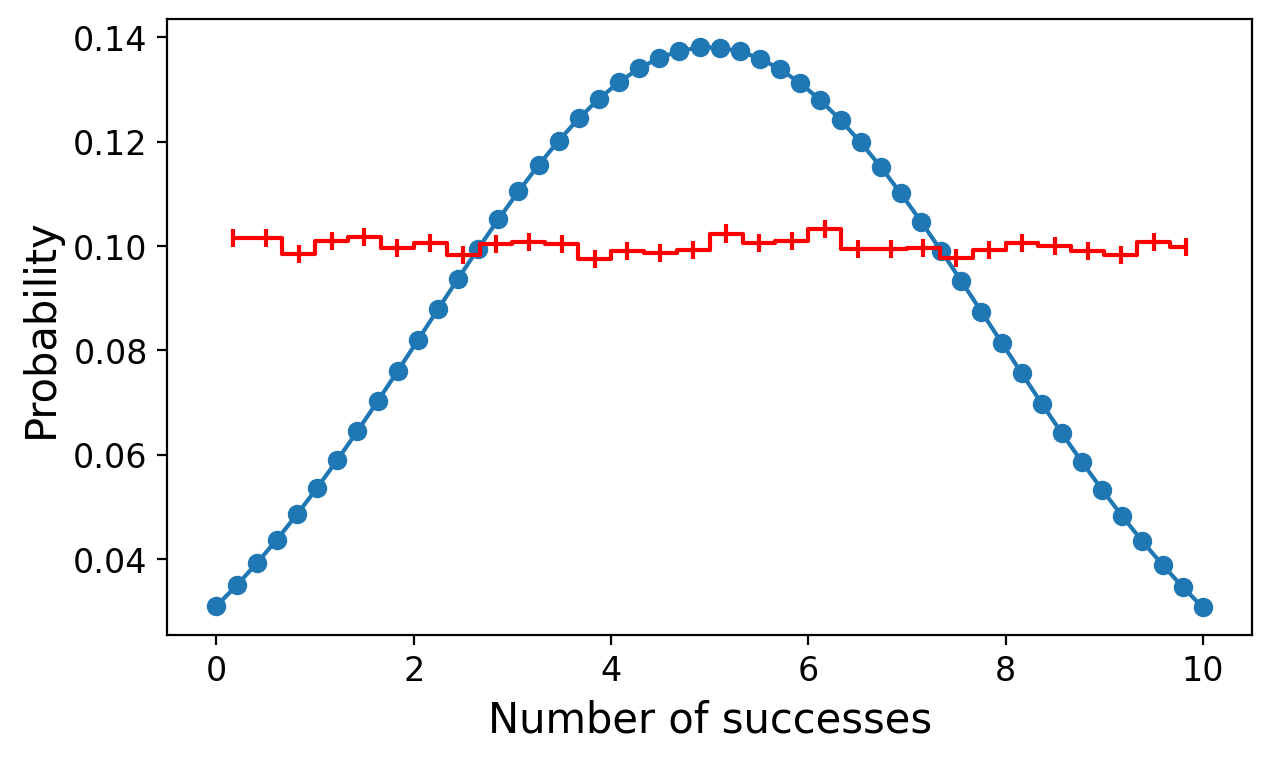

Summing: 2  numbers with mean: 10.017053610868487  and std-deviation 4.080492876098024 4.089445012121926


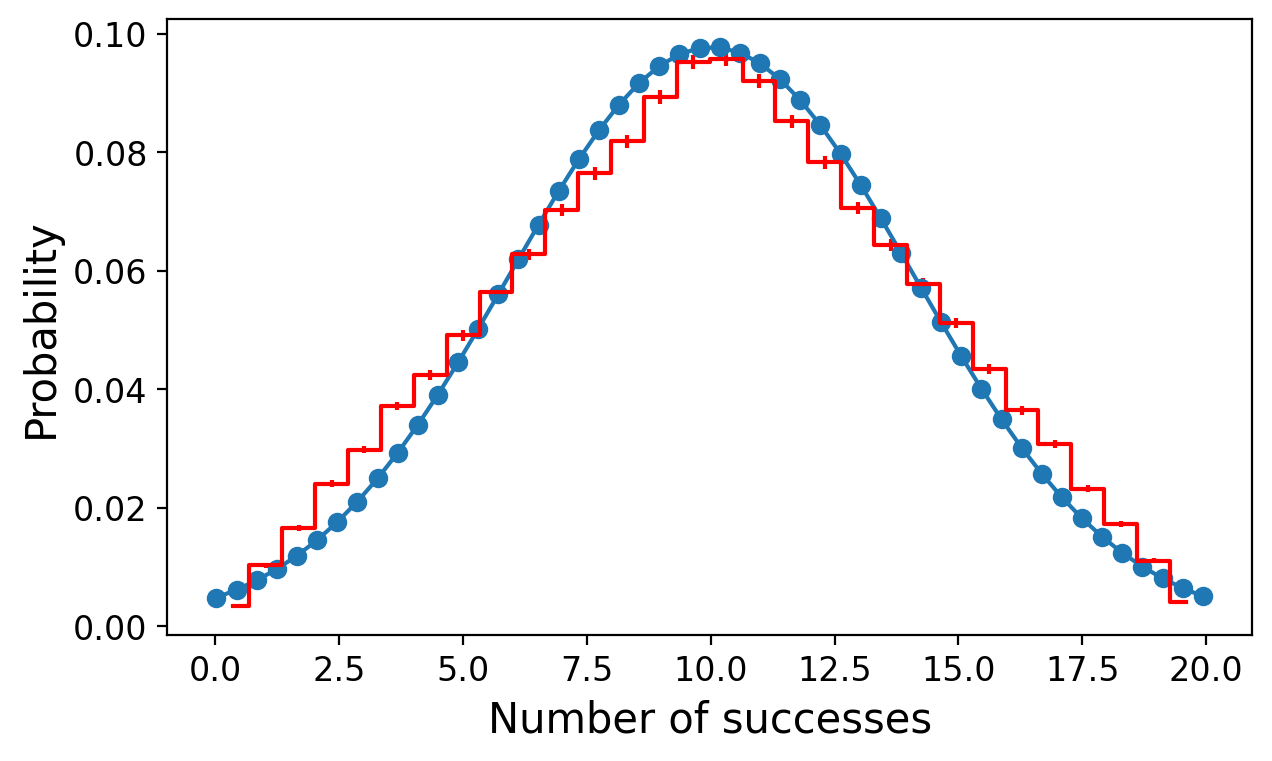

Summing: 3  numbers with mean: 15.003250223881718  and std-deviation 5.01046442266062 5.001083407960572


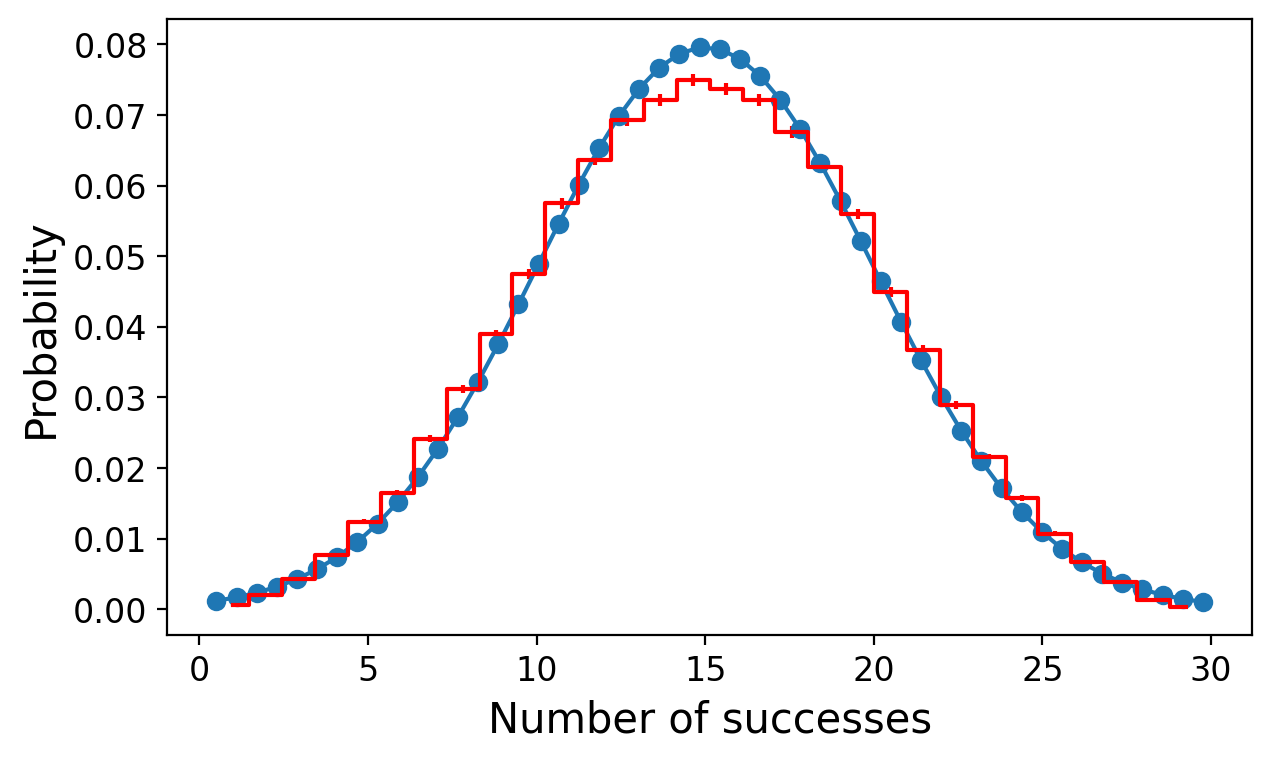

Summing: 4  numbers with mean: 20.014133440062214  and std-deviation 5.761604158497247 5.777582664608505


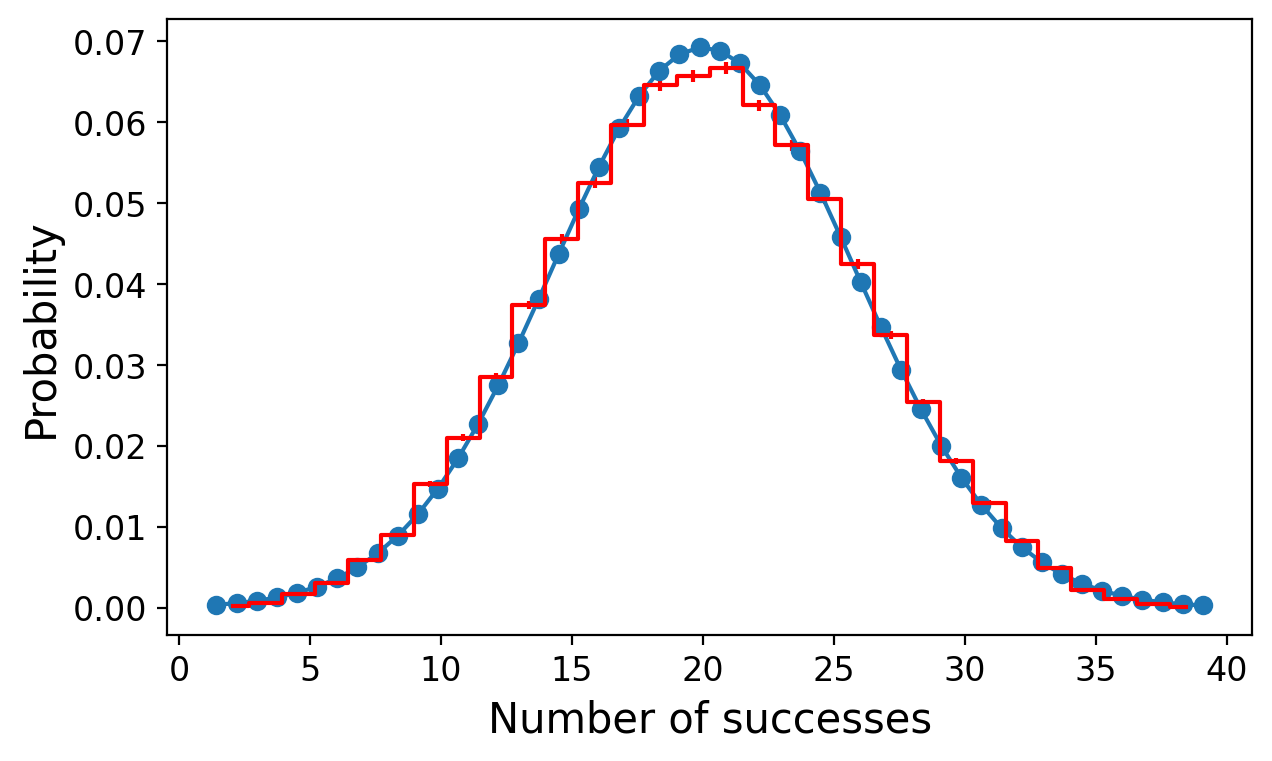

Summing: 50  numbers with mean: 249.99324379664884  and std-deviation 20.396788688389094 20.411862881499523


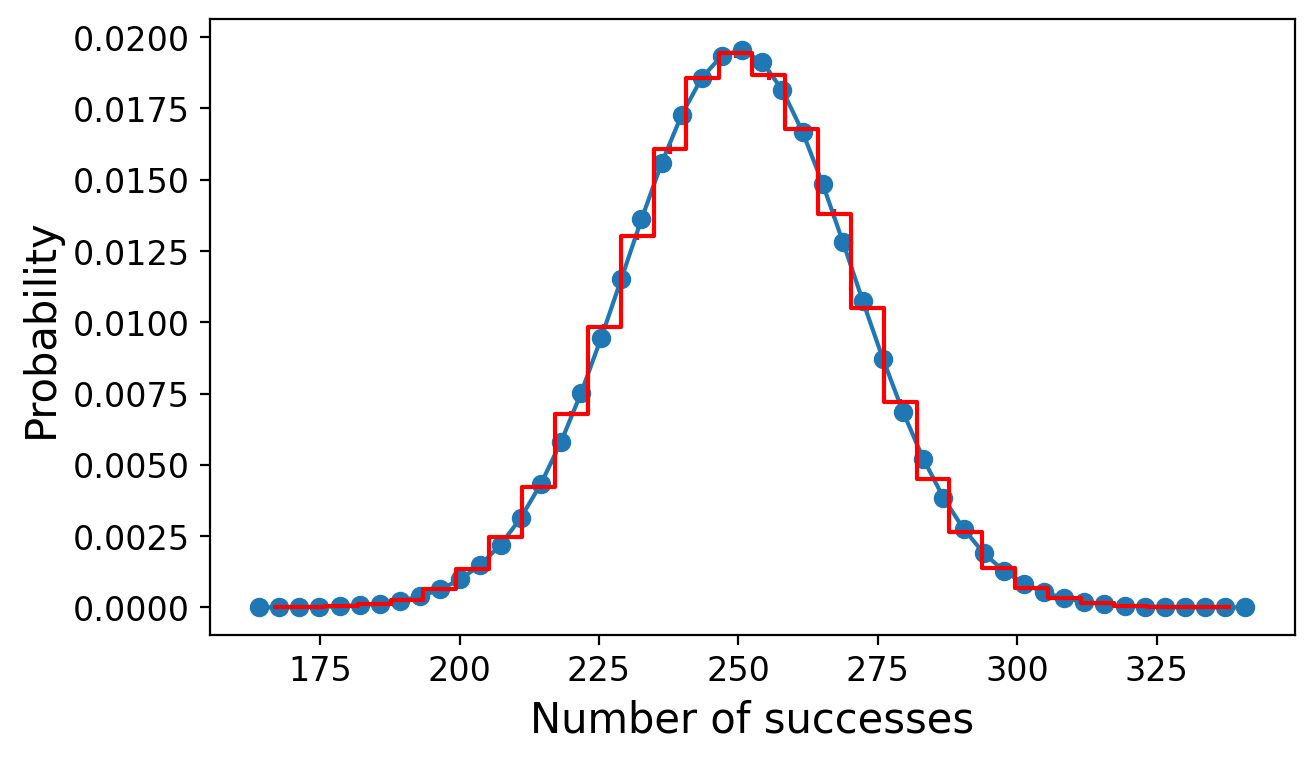

Summing: 5000  numbers with mean: 25000.289906686783  and std-deviation 203.95361717998964 204.12651231011696


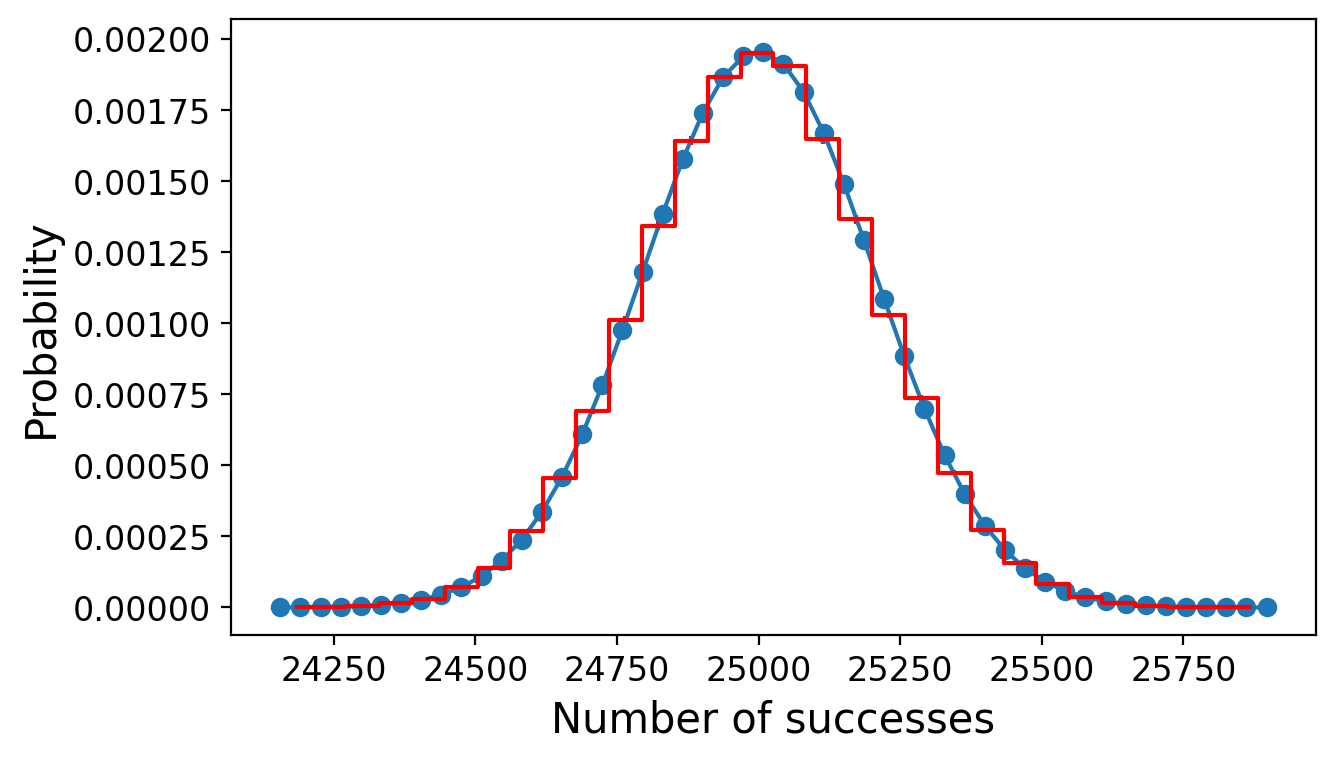

In [23]:
#>>>RUN: L2.5-runcell01

import math


def normhist(iVars,iNbins=30,iNormalize=True):
    y0, bin_edges = np.histogram(iVars, bins=iNbins)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    norm0 = 1 
    if iNormalize:
        norm0=len(iVars)*(bin_edges[-1]-bin_edges[0])/iNbins
    plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,drawstyle = 'steps-mid',c='red')
    return bin_centers,y0,bin_edges

def plotSum(iN):
    ntoys=100000
    sums=np.array([])
    for i0 in range(ntoys):
        pToy = np.random.uniform(0,10,iN)
        sums = np.append(sums,pToy.sum())
    _,_,binrange=normhist(sums) #plots a Gaussian hist
    k=np.linspace(binrange[0],binrange[-1], 50)
    normal=stats.norm.pdf(k,sums.mean(),sums.std())
    plt.plot(k,normal,'o-')
    plt.xlabel("Number of successes")
    plt.ylabel("Probability")
    print("Summing:",iN," numbers with mean:",sums.mean()," and std-deviation",sums.std(),sums.mean()/math.sqrt(3*iN))
    plt.show()

plotSum(1)
plotSum(2)
plotSum(3)
plotSum(4)
plotSum(50)
plotSum(5000)


So, the sum of a large group of random numbers drawn from a uniform distribution approaches a Gaussian. This is a very important statement. Effectively, this means that any combination of random variables is a Gaussian distribution; this sounds crazy! We will not show the full proof here, but suffice it to say, doing the integrals yields the same observation. 


Another interesting thing to note is that the standard deviation of this Gaussian is incidentally given by the (range of uniform distribution)$/\sqrt{12}$. To verify this, for the last experiment with $N = 5000$ draws, we have the following:


In [24]:
#>>>RUN: L2.5-runcell02

N = 5000
unif_range = 10
print("stddev:", np.sqrt(N * unif_range ** 2 / 12))


stddev: 204.1241452319315


This matches the standard deviation we obtain numerically. To see this analytically, let's compute it using the variable substitution $2a'=b-a$.

$$
\begin{eqnarray}
V[x]&=&\int_{a}^{b}\frac{1}{b-a}\left(x-\frac{b-a}{2}\right)^2 dx\\
V[x]&=&\int_{-a^\prime}^{a^\prime}\frac{1}{2a^\prime}\left(x\right)^2 dx\\
V[x]&=&\frac{1}{2a^\prime}\frac{1}{3}\left(x\right)^3|_{-a^\prime}^{a^\prime} \\
V[x]&=&\frac{2a'^3}{2a^\prime}\frac{1}{3} \\
V[x]&=&\frac{\left(\frac{b-a}{2}\right)^2}{3} \\
V[x]&=&\frac{\left(b-a\right)^2}{12} \\
\end{eqnarray}
$$

So, to get the RMS of $N$ random variables summed up, we multiply this variance by $N$. We can further note that the average of $N$ summed variables gives $\bar{x}=\frac{b-a}{2}$. Combining all of this, we have: 



$$
\begin{eqnarray}
V[x_1+x_2+...+x_N]&=& N \frac{\left(b-a\right)^2}{12}\\
V[x_1+x_2+...+x_N]&=& N \frac{\bar{x}^2}{3}\\
\end{eqnarray}
$$

This is why we can calculate the standard deviation of our sample using the above formula. In any case, we will take this demo as a proof by demo of what we call **the central limit theorem** which states that **for any distribution composed of inputs from a large number of continuous random variables, the sum tends to a Gaussian**. For fun, outside of class, go ahead and derive it.

<h3>Comparison of Poisson and Gaussian</h3>

Let's compare the Gaussian with a Poisson distribution, so we can connect all of our friends together. 

Compare the Poisson distribution to a Gaussian distribution for $\lambda$=3, 15, 100. How do these distributions vary? 

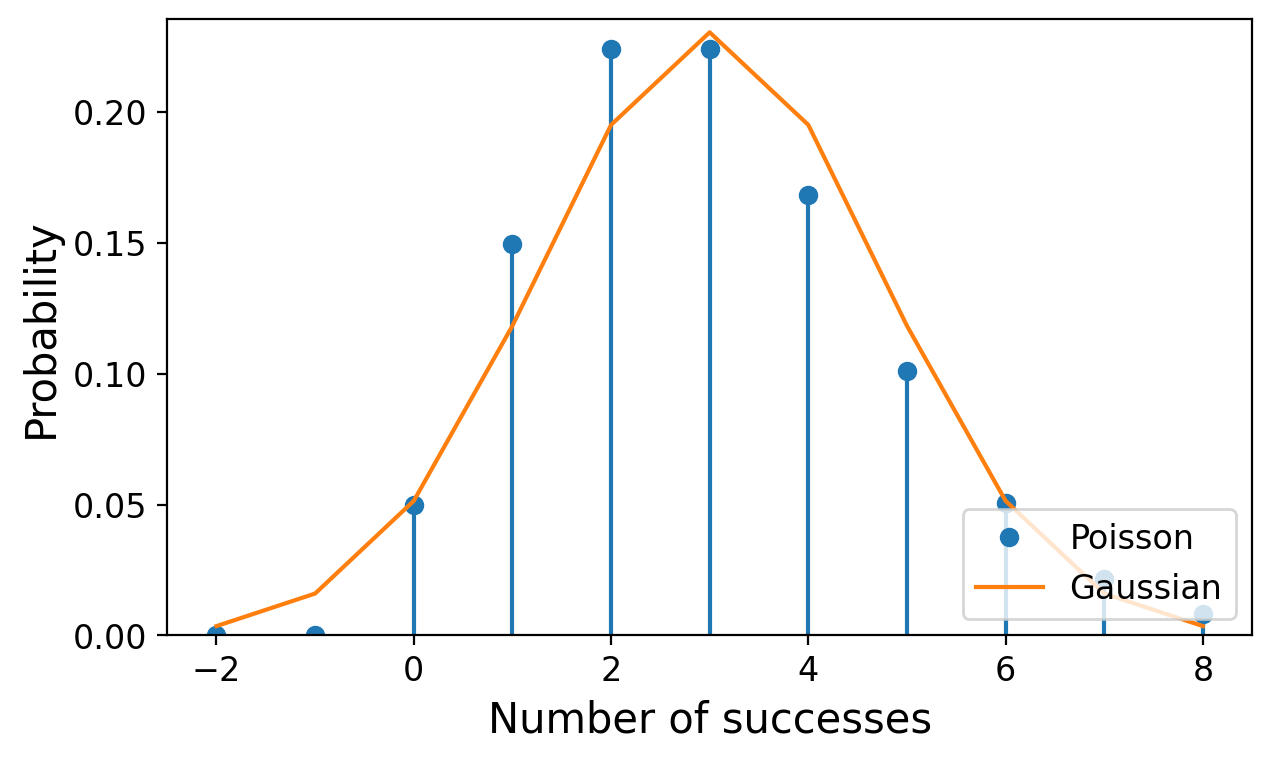

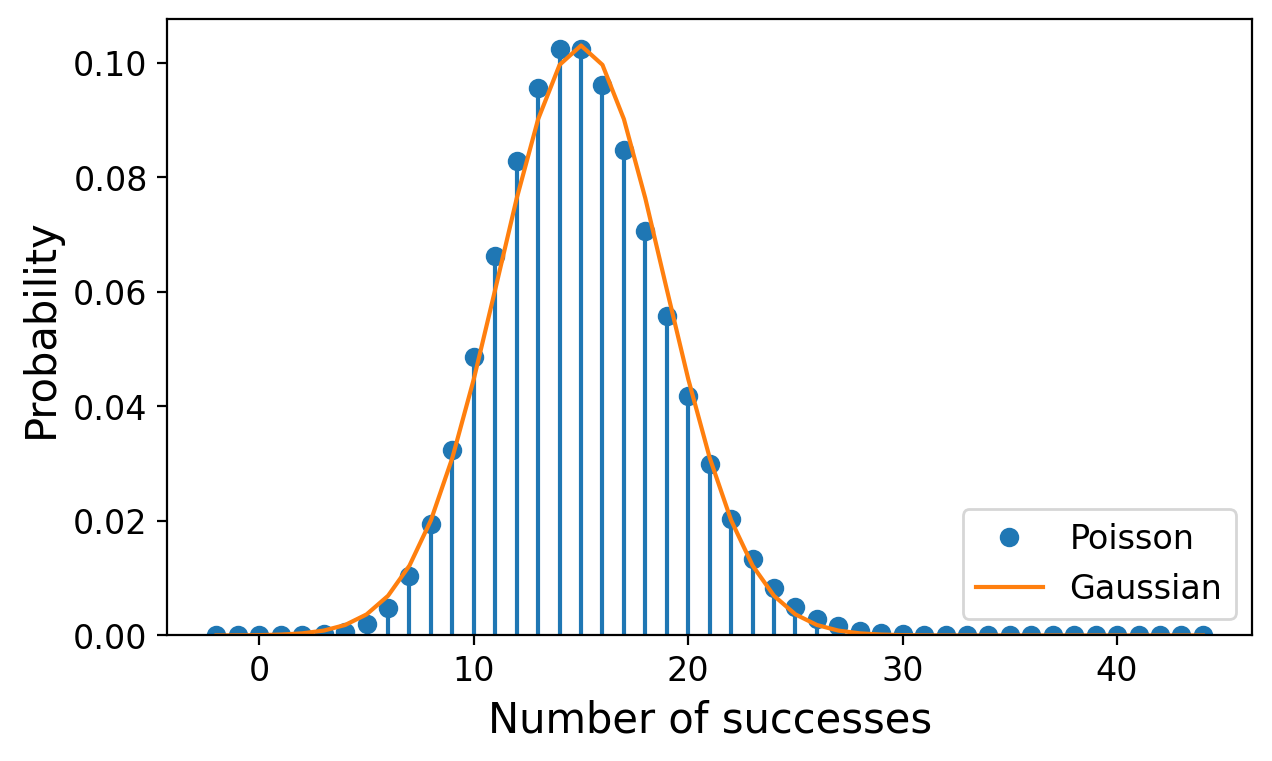

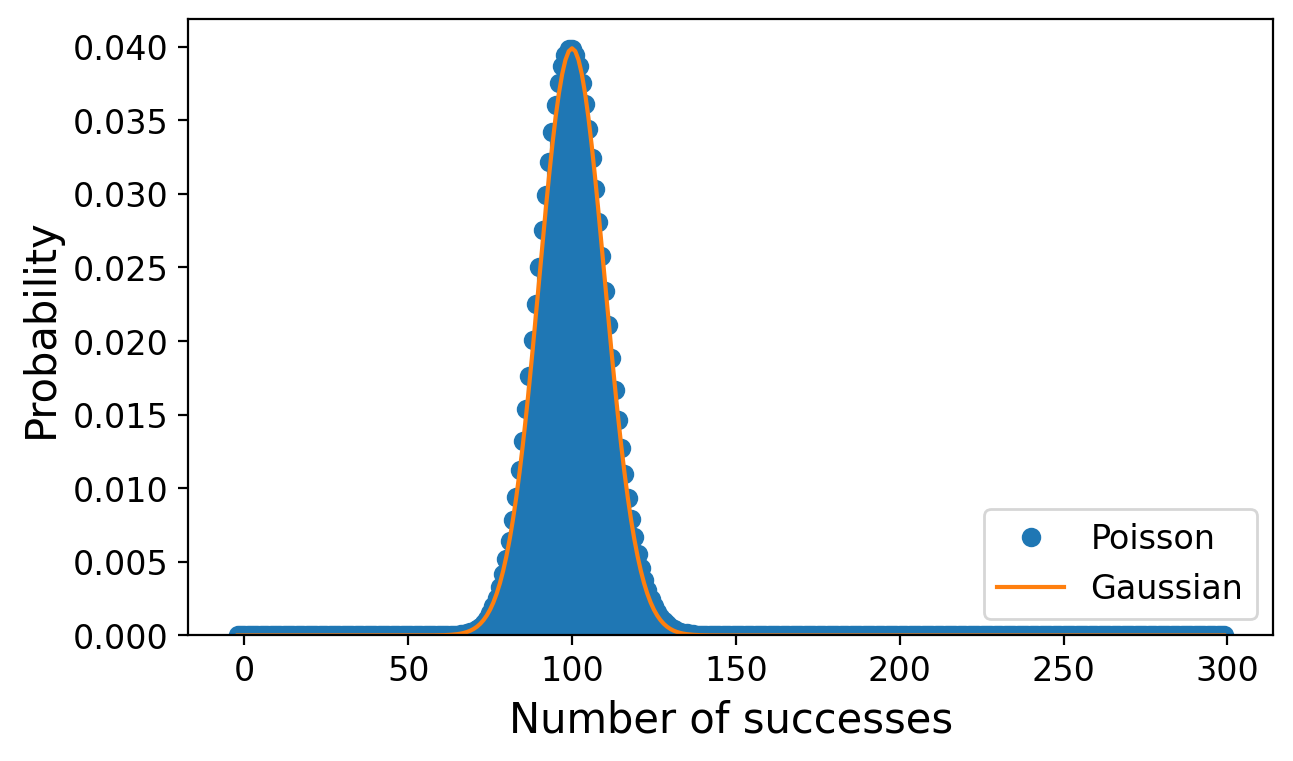

In [25]:
#>>>RUN: L2.5-runcell03

#solution 1
##### Let's plot a Gaussian and Poisson with same mean and RMS
def poisGausPlot(n):
    lamb=n
    k=np.arange(-2,3.0*n)
    poisson=stats.poisson.pmf(k,lamb) ### <=====
    normal=stats.norm.pdf(k,n,math.sqrt(n)) #### <=====
    plt.plot(k,poisson,'o',label='Poisson')
    plt.vlines(k,0, poisson, color=plt.gca().lines[-1].get_color())
    plt.ylim(bottom=0)
    plt.plot(k,normal,'-',label='Gaussian')
    plt.xlabel("Number of successes")
    plt.ylabel("Probability")
    plt.legend(loc='lower right')
    plt.show()

poisGausPlot(3)
poisGausPlot(15)
poisGausPlot(100)


<a name='exercises_2_5'></a>     

| [Top](#section_2_0) | [Restart Section](#section_2_5) | [Next Section](#section_2_6) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-2.5.1: Sum of Two Gaussians</span>

Show that the sum of two Gaussian distributions is also Gaussian. To do this, plot the normalized histogram of the sum of two numbers drawn from identical Gaussian distributions. In the same figure, plot a Gaussian distribution with mean and standard deviation equal to the mean and standard deviation of the summed distribution. Write your own code, or run the code below.


Based on the output of your code, how is the standard deviation of the summed distribution, $\sigma_{\mathrm{sum}}$, related to the standard deviation of the Gaussian distributions from which the samples are drawn (call this $\sigma_0$)? Choose from the options below.

- $\sigma_{\mathrm{sum}} = 2\sigma_0$
- $\sigma_{\mathrm{sum}} = \sqrt{2}\sigma_0$
- $\sigma_{\mathrm{sum}} = \sigma_0$
- $\sigma_{\mathrm{sum}} = \sigma_0/\sqrt{2}$
- $\sigma_{\mathrm{sum}} = \sigma_0/2$


How would this relation change if you summed more samples (here we just did 2, 100000 times). Try varying $\sigma$ and the number of samples chosen (where are these defined in the code)?

Summing: 2, numbers with mean: 0.0002405459158694269  and std-deviation 1.4170795534056249


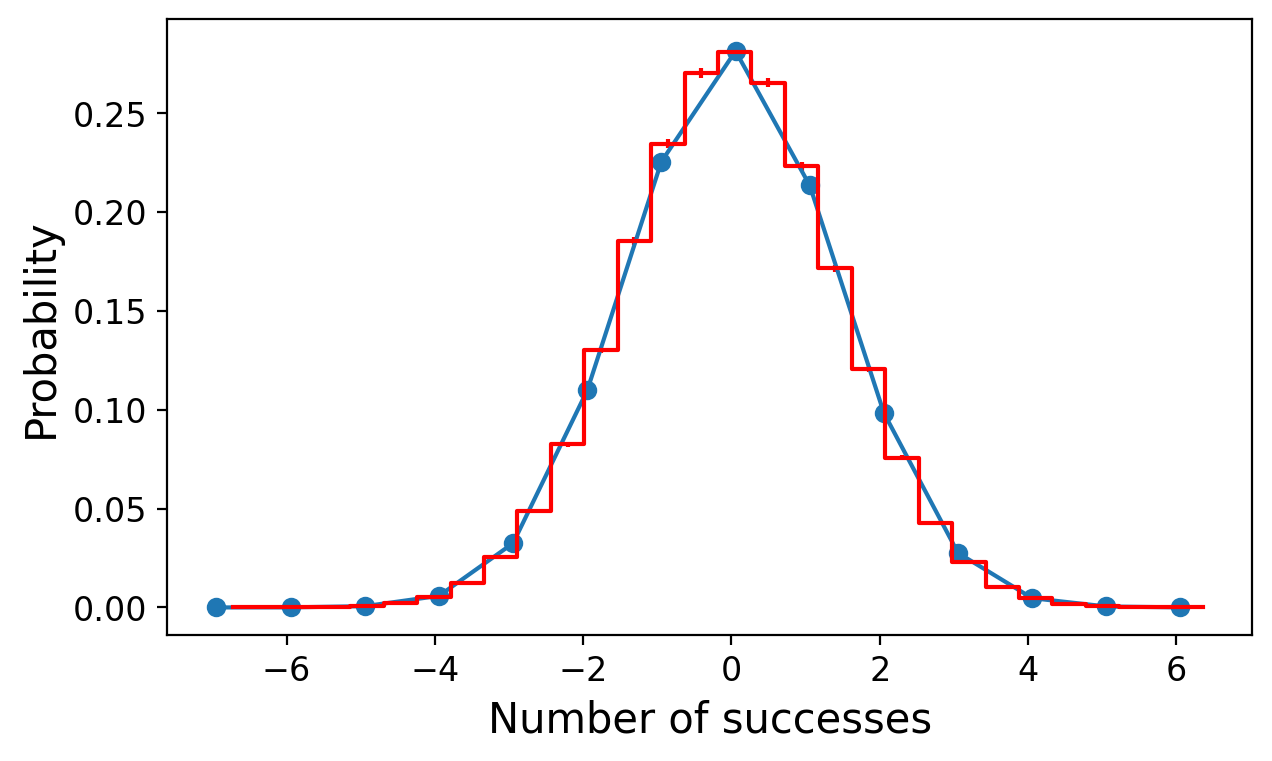

In [26]:
#>>>EXERCISE: L2.5.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

#Generate 2 Gaussian and sum 
ntoys=100000
istdev=1
sums=np.array([])
for i0 in range(ntoys):
    pToy = np.random.normal(0,istdev,2)
    sums = np.append(sums,pToy.sum())
_,_,binrange=normhist(sums)

k=np.arange(binrange[0],binrange[-1])
normal=stats.norm.pdf(k,sums.mean(),sums.std())

plt.plot(k,normal,'o-')
plt.xlabel("Number of successes")
plt.ylabel("Probability")
print("Summing: 2, numbers with mean:",sums.mean()," and std-deviation",sums.std())
plt.show()

In [ ]:
#>>>SOLUTION: L2.5.1

#Generate 2 Gaussian and sum 
ntoys=100000
istdev=1
sums=np.array([])
for i0 in range(ntoys):
    pToy = np.random.normal(0,istdev,2)
    sums = np.append(sums,pToy.sum())
_,_,binrange=normhist(sums)

k=np.arange(binrange[0],binrange[-1])
normal=stats.norm.pdf(k,sums.mean(),sums.std())

plt.plot(k,normal,'o-')
plt.xlabel("Number of successes")
plt.ylabel("Probability")
print("Summing: 2, numbers with mean:",sums.mean()," and std-deviation",sums.std())
print("ratio of sum std-deviation to sampled std-deviation", sums.std()/istdev)
plt.show()

#we expect a standard deviation of sqrt(2), this follows from Var(x1+x2)=N Var(x)

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
See the code above, we expect  $\sqrt{2}\sigma_0$ for the standard devaition
</pre>
        
**EXPLANATION:**
    
We expect a standard deviation of $\sqrt{2}\sigma_0$, this follows from `Var(x1+x2)=N Var(x)`, if `x1` and `x2` have the same variances.
    
You could include the following line to demonstrate this:

<pre>
print("ratio of sum std-deviation to sampled std-deviation", sums.std()/istdev)
</pre>
    
We will explore this more in the next section.
    
</div>


>#### Follow-up 2.5.1a (ungraded)
>  
>We've compared the Poisson and binomial distributions, and Poisson and Gaussian distribution. Now try comparing the binomial and Gaussian distributions. What similarities and differences do they have?

<a name='section_2_6'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L2.6 Uncertainties in Measurement</h2>  

| [Top](#section_2_0) | [Previous Section](#section_2_5) | [Exercises](#exercises_2_6) | [Next Section](#section_2_7) |


<h3>Slides</h3>

Run the code below to view the slides for this lesson, which are discussed in the videos. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L02/slides2.html" target="_blank">HERE</a>.

In [45]:
#>>>RUN: L2.6-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L02/slides2.html', width=975, height=550)

<h3>Slides</h3>

View the slides for this section below, which are also discussed in the videos. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L02/slides2.html" target="_blank">HERE</a>.

<p align="center">
<iframe src="https://mitx-8s50.github.io/slides/L02/slides2.html" width="900", height="550" frameBorder="0"/>
</p>

<h3>Overview</h3>

In the previous Lesson, we explained that the expectation is the mean of a distribution and the variance is a measure of the width. When we perform a measurement, we are just sampling from an unknown distribution, or worse yet, we are sampling from an unknown distribution and then distorting that distribution with some sort of effect. 

Let's say that you are sampling a distribution that is fundamentally a Gaussian. Now on top of this, we then distort this distribution by a function $f(x)$. This distortion will modify the distribution of the events, making it less Gaussian, or shrinking and stretching it. A distortion function can arise from many aspects of the measurement, such as from sending a particle through a magnetic field, or having light reflect off a mirror. There are countless examples of such distortive effects in physical measurements. If we happen to know $f(x)$ as well as the distribution of $x$, how does the shape of $x$ get distorted by $f(x)$?

To answer this question, consider the case where the probability of the input distribution is $p(x)$. If we define $x^{\prime}=f(x)$,  the probability to be in a small region $dx^\prime$ of the modified coordinates is defined by
$x^{\prime}=f(x)$,  the probability to be in small region $dx^\prime$ of the modified coordinates is defined by

$$
\begin{eqnarray}
p^{\prime}(x^\prime)dx^\prime&=&f(p(x))dx^\prime \\
                             &=&f(p(x))\frac{dx^\prime}{dx}dx\\
                             &=&f(p(x))\frac{df}{dx}dx\\
\end{eqnarray}
$$

This follows from the fact that the spread of a function sampled from $p(x)$ would be modified by the spread of $f(x)$ defined as  $f(x+\Delta x)-f(x)\approx\frac{df}{dx}\Delta x$. 

As a simple example, in the case of $f(x)=x^{2}$ or $\frac{df}{dx}=2x$. What that means is that $\sigma_{f(x)}\approx2x\sigma_{x}$. Let's actually see that empirically.


Mean: 10000.886616514657 Stddeviation: 199.52028031146634
Predicted Mean: 10000 Stddeviation: 200


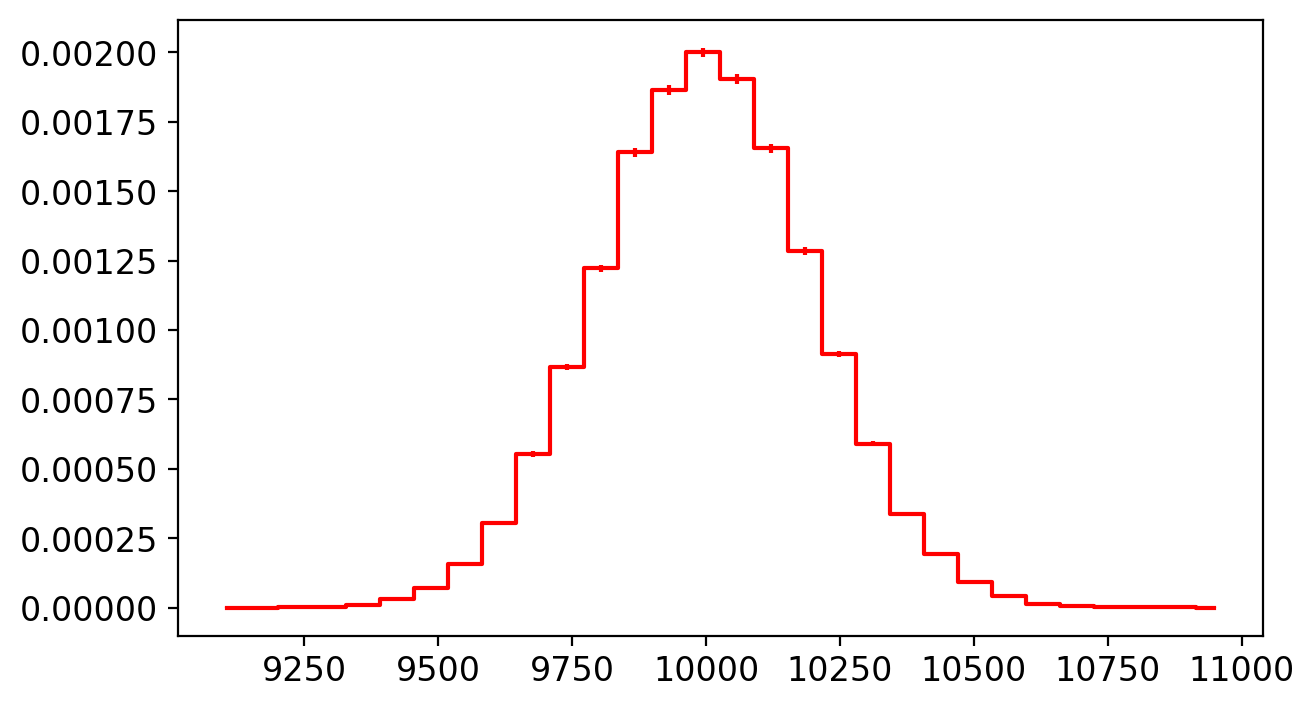

In [29]:
#>>>RUN: L2.6-runcell01

#Now let's say we do a measurement, and the measurement takes an input variable that is varying, 
#and applies a function to it. What is the spread of the function
ntries=100000
sigx=1
meas = np.full(ntries,100) #The value 100, 1k times
unc  = np.random.normal (0,sigx, ntries) #a randomly sampled value from a Gaussian with width 1 1k times
meas = meas+unc # the value 100 now smeared with sigma=1

def function(ix):#our function
    return ix**2
outmeas = function(meas)
_,_,_=normhist(outmeas)

print("Mean:",outmeas.mean(),"Stddeviation:",outmeas.std())
print("Predicted Mean:",function(100),"Stddeviation:",2*100*sigx) #expect it to be 2*100*1


Now, what about if we have two sources of uncertainty? This is a little bit different in the sense that these variations are independent of each other. Let's consider the very simple function $f(x)=x$. Now, let's say that $x$ can vary by a Gaussian distributed variable $\sigma_1$ and a second Gaussian distributed variable $\sigma_2$. If we consider these variations, we have that $f(x)$ will be modified by


$$
\begin{equation}
 f(x) = x + \sigma_1 + \sigma_2
\end{equation}
$$

This will give us two Gaussians. If we look to see the variance of this distribution, we can treat these two fluctuations as two independent measurements, which means we can write. 

$$
\begin{eqnarray}
 V[f(x)] &=& V(x) + V(\sigma_1) + V(\sigma_2)\\
                &=& \sigma_1^2 + \sigma_2^2 
\end{eqnarray}
$$

To visualize what is going on, we can imagine plotting these variations in a 2D plot. 



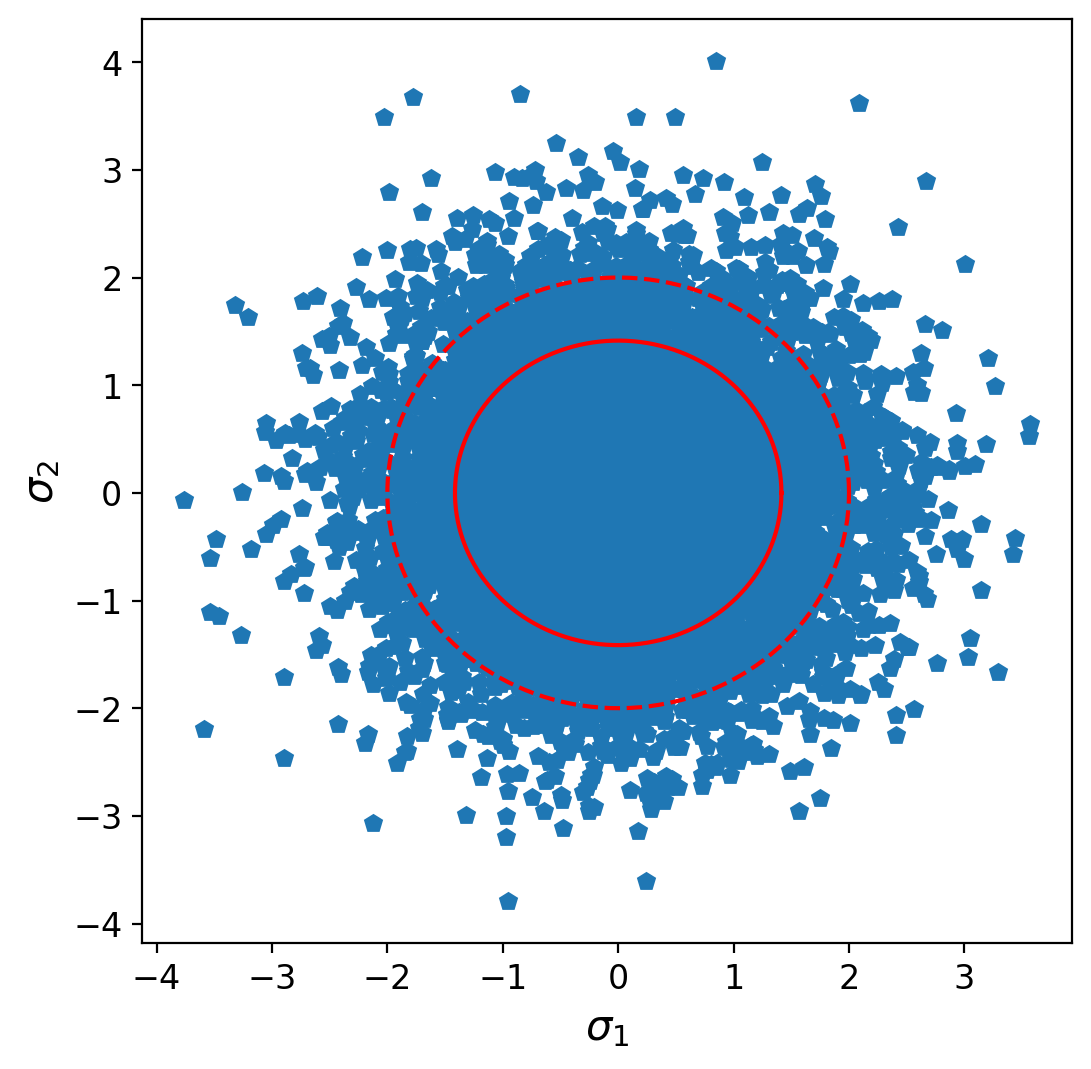

In [32]:
#>>>RUN: L2.6-runcell02

ntoys=10000
err1=np.array([])
err2=np.array([])
for i0 in range(ntoys):
    pToy = np.random.normal(0,1,2) #==> Notice the ,2 at the rightmost point 
    err1 = np.append(pToy[0],err1)
    err2 = np.append(pToy[1],err2)
angle = np.linspace( 0 , 2 * np.pi , 150 ) 

#correct circle (radius sqrt(2))
radius = 1*np.sqrt(2)
x = radius * np.cos( angle ) 
y = radius * np.sin( angle ) 
#too large circle (radius 2)
radius = 1*2.0
x2 = radius * np.cos( angle ) 
y2 = radius * np.sin( angle ) 

plt.rcParams['figure.figsize'] = (6,6)
plt.plot(err1,err2,"p")
plt.plot(x,y,c='r')
plt.plot(x2,y2,c='r',linestyle='dashed')
plt.xlabel("$\sigma_{1}$")
plt.ylabel("$\sigma_{2}$")
plt.show()
plt.rcParams['figure.figsize'] = (9,6)

Sampling two Gaussians gives us a circular distribution with a width given by the radius of the circle. This radius can be seen to be the standard deviation of $f(x)$ or the $\sqrt{V[f(x)]}=\sqrt{\sigma_1^2+\sigma_2^2}$. In other words, when sampling two independent variables, the variations add as their squares, as if they are two separate independent coordinates. This is often denoted as a "Sum in Quadrature."

<a name='exercises_2_6'></a>     

| [Top](#section_2_0) | [Restart Section](#section_2_6) | [Next Section](#section_2_7) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-2.6.1: Uncertainty in $f(x)$</span>

If $f(x) = \log(x)$, what is $\sigma_{f(x)}$ in terms of $x$ and $\sigma_{x}$? Express your answer in terms of `x` and `sigma_x` for $\sigma$.


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**


The derivation is shown here: $\sigma_{f(x)} = \frac{df}{dx} \sigma_{x} = \frac{1}{x}\sigma_{x}$

    
</div>


>#### Follow-up 2.6.1a (ungraded)
>  
>Try computing this numerically and comparing to your analytic solution.


Mean: 4.604280659366279 Stddeviation: 0.05015500147461118
Predicted Mean: 4.605170185988092 Stddeviation: 0.05


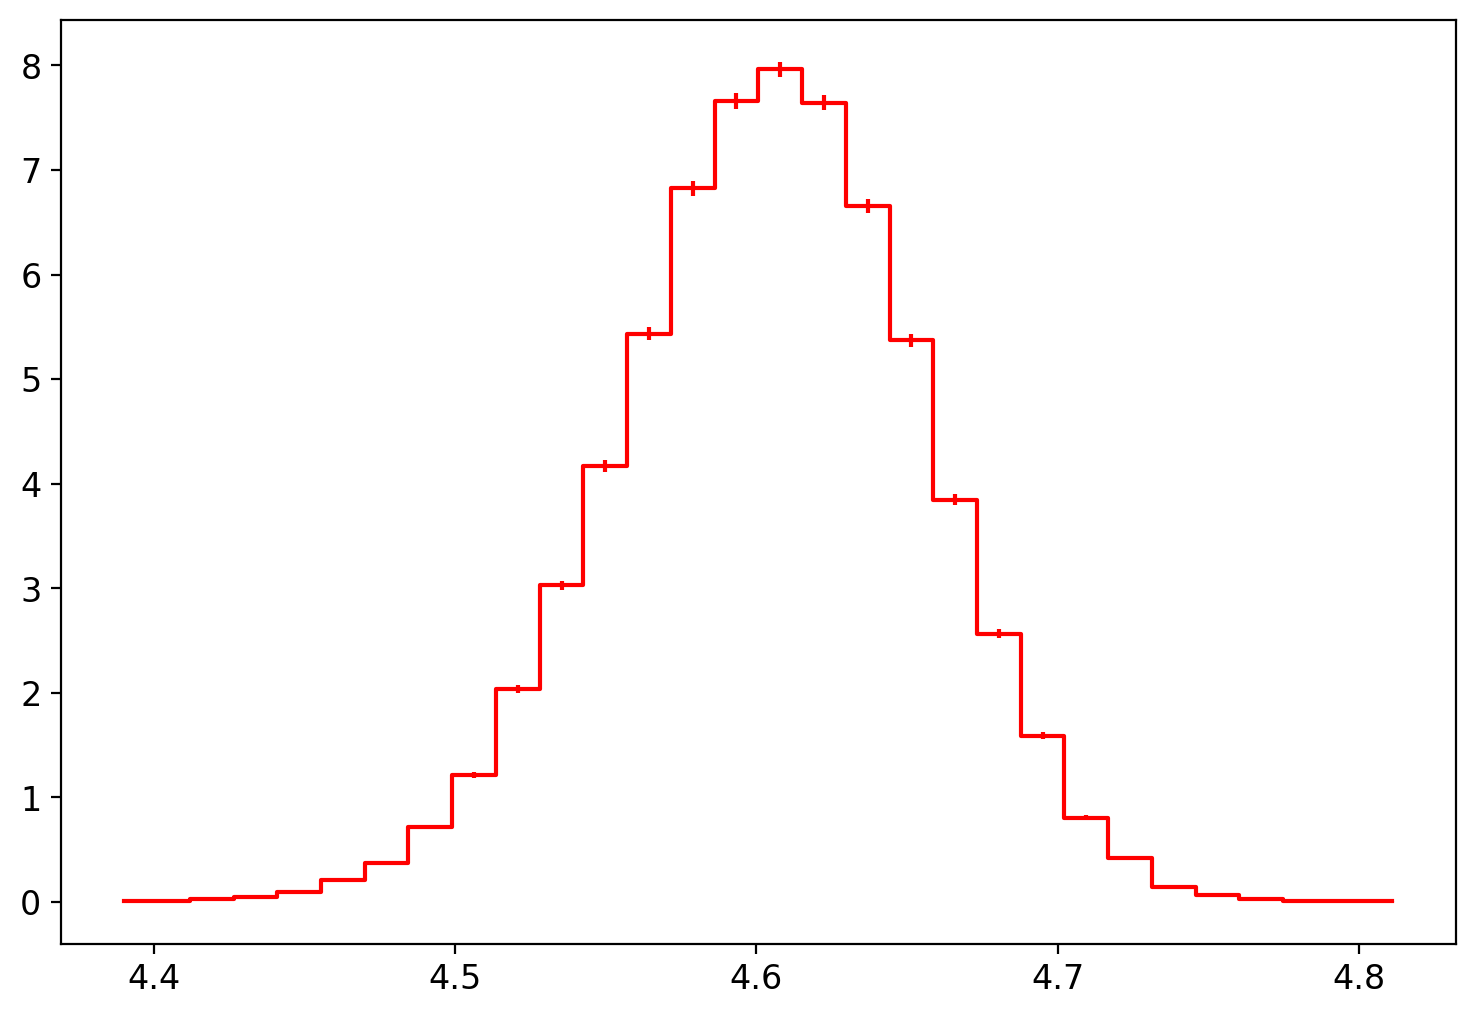

In [33]:
#>>>EXERCISE: L2.6.1a
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

ntries=100000
mean=100
sigma=5
meas = np.full(ntries,mean) #The value 100, 1k times
unc  = np.random.normal (0,sigma, ntries) #a randomly sampled value from a Gaussian with width 1 1k times
meas = meas+unc # the value 100 now smeared with sigma=1

def function(ix):#our function
    return np.log(ix)

outmeas = function(meas)
_,_,_=normhist(outmeas)

analytic_stdev = #YOUR CODE HERE

print("Mean:",outmeas.mean(),"Stddeviation:",outmeas.std())
print("Predicted Mean:",function(mean),"Stddeviation:",analytic_stdev)


In [ ]:
#>>>SOLUTION: L2.6.1a

ntries=100000
mean=100
sigma=5
meas = np.full(ntries,mean) #The value 100, 1k times
unc  = np.random.normal (0,sigma, ntries) #a randomly sampled value from a Gaussian with width 1 1k times
meas = meas+unc # the value 100 now smeared with sigma=1

def function(ix):#our function
    return np.log(ix)

outmeas = function(meas)
_,_,_=normhist(outmeas)

analytic_stdev = (1./mean)*sigma

print("Mean:",outmeas.mean(),"Stddeviation:",outmeas.std())
print("Predicted Mean:",function(mean),"Stddeviation:",analytic_stdev)


<a name='section_2_7'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L2.7 Propagating Uncertainties</h2>     

| [Top](#section_2_0) | [Previous Section](#section_2_6) | [Exercises](#exercises_2_7) |


<h3>A realistic example</h3>

Very famously, there was an excess of events found at a certain point in a distribution measured by an experiment at the Tevatron collider in Fermilab. This excess caused a lot of excitement. However many people were skeptical. <a href="https://www.science20.com/quantum_diaries_survivor/no_jetjet_bump_new_cdf_diboson_analysis-123327" target="_blank">HERE</a> is a full description of what was going on. In brief, the two plots shown below summarize the evidence that people thought showed a bump indicating the existence of a new particle:

<img alt="Fig 2.7.1: excess of events at the Tevatron collider" src="http://www.pd.infn.it/~dorigo/wjjcdf73fb.jpg" width="700"/>

>source:  https://arxiv.org/pdf/1104.0699.pdf<br>
>attribution: CDF Collaboration, arXiv:1104.0699v2

The plots show the number of events as a function of the so-called "invariant mass" of a pairs of jets. The term "jets" refers to a cluster of particles all emitted in very close to the same direction. When two such jets are observed, one can calculate the mass of a hypothetical very short lifetime particle which could have decayed to produce the two observed jets. This mass needs to be corrected for relativistic effects to determine its value when that particle was at rest, hence the term "invariant mass".

In both plots, the black points represent a histogram of the data. The filled in areas in the left plot are a histogram summing up the simulations of all the other physics processes that we know are occurring. The different fill colors represent each individual prediction. Finally, on the right, we subtract the solid distribution from the data. However, notice that the "WW+WZ" process shown in red in the left plot has not been subtracted. That contribution is shown as the red histogram in the right plot. The blue histogram on the right plot is a Gaussian fit to what appears to be a deviation in the data compared to the sum of all expected physics processes. 

The fact that this deviation corresponds to a bump makes us think this is a new particle. The problem with this bump is that it's a bump on top of a steeply falling distribution. You need to look very closely at the left plot to see this same blue "bump" contribution. So, what would happen to this comparison if our predicted distribution was shifted to the right by a little bit. What would the effect be on the appearance of the bump?

To see this, let's open a file with this data and try to shift it ourselves. Note that the following code subtracts *all* of the expected physics processes so that the second plot below does not show the red bump seen in the right plot above.

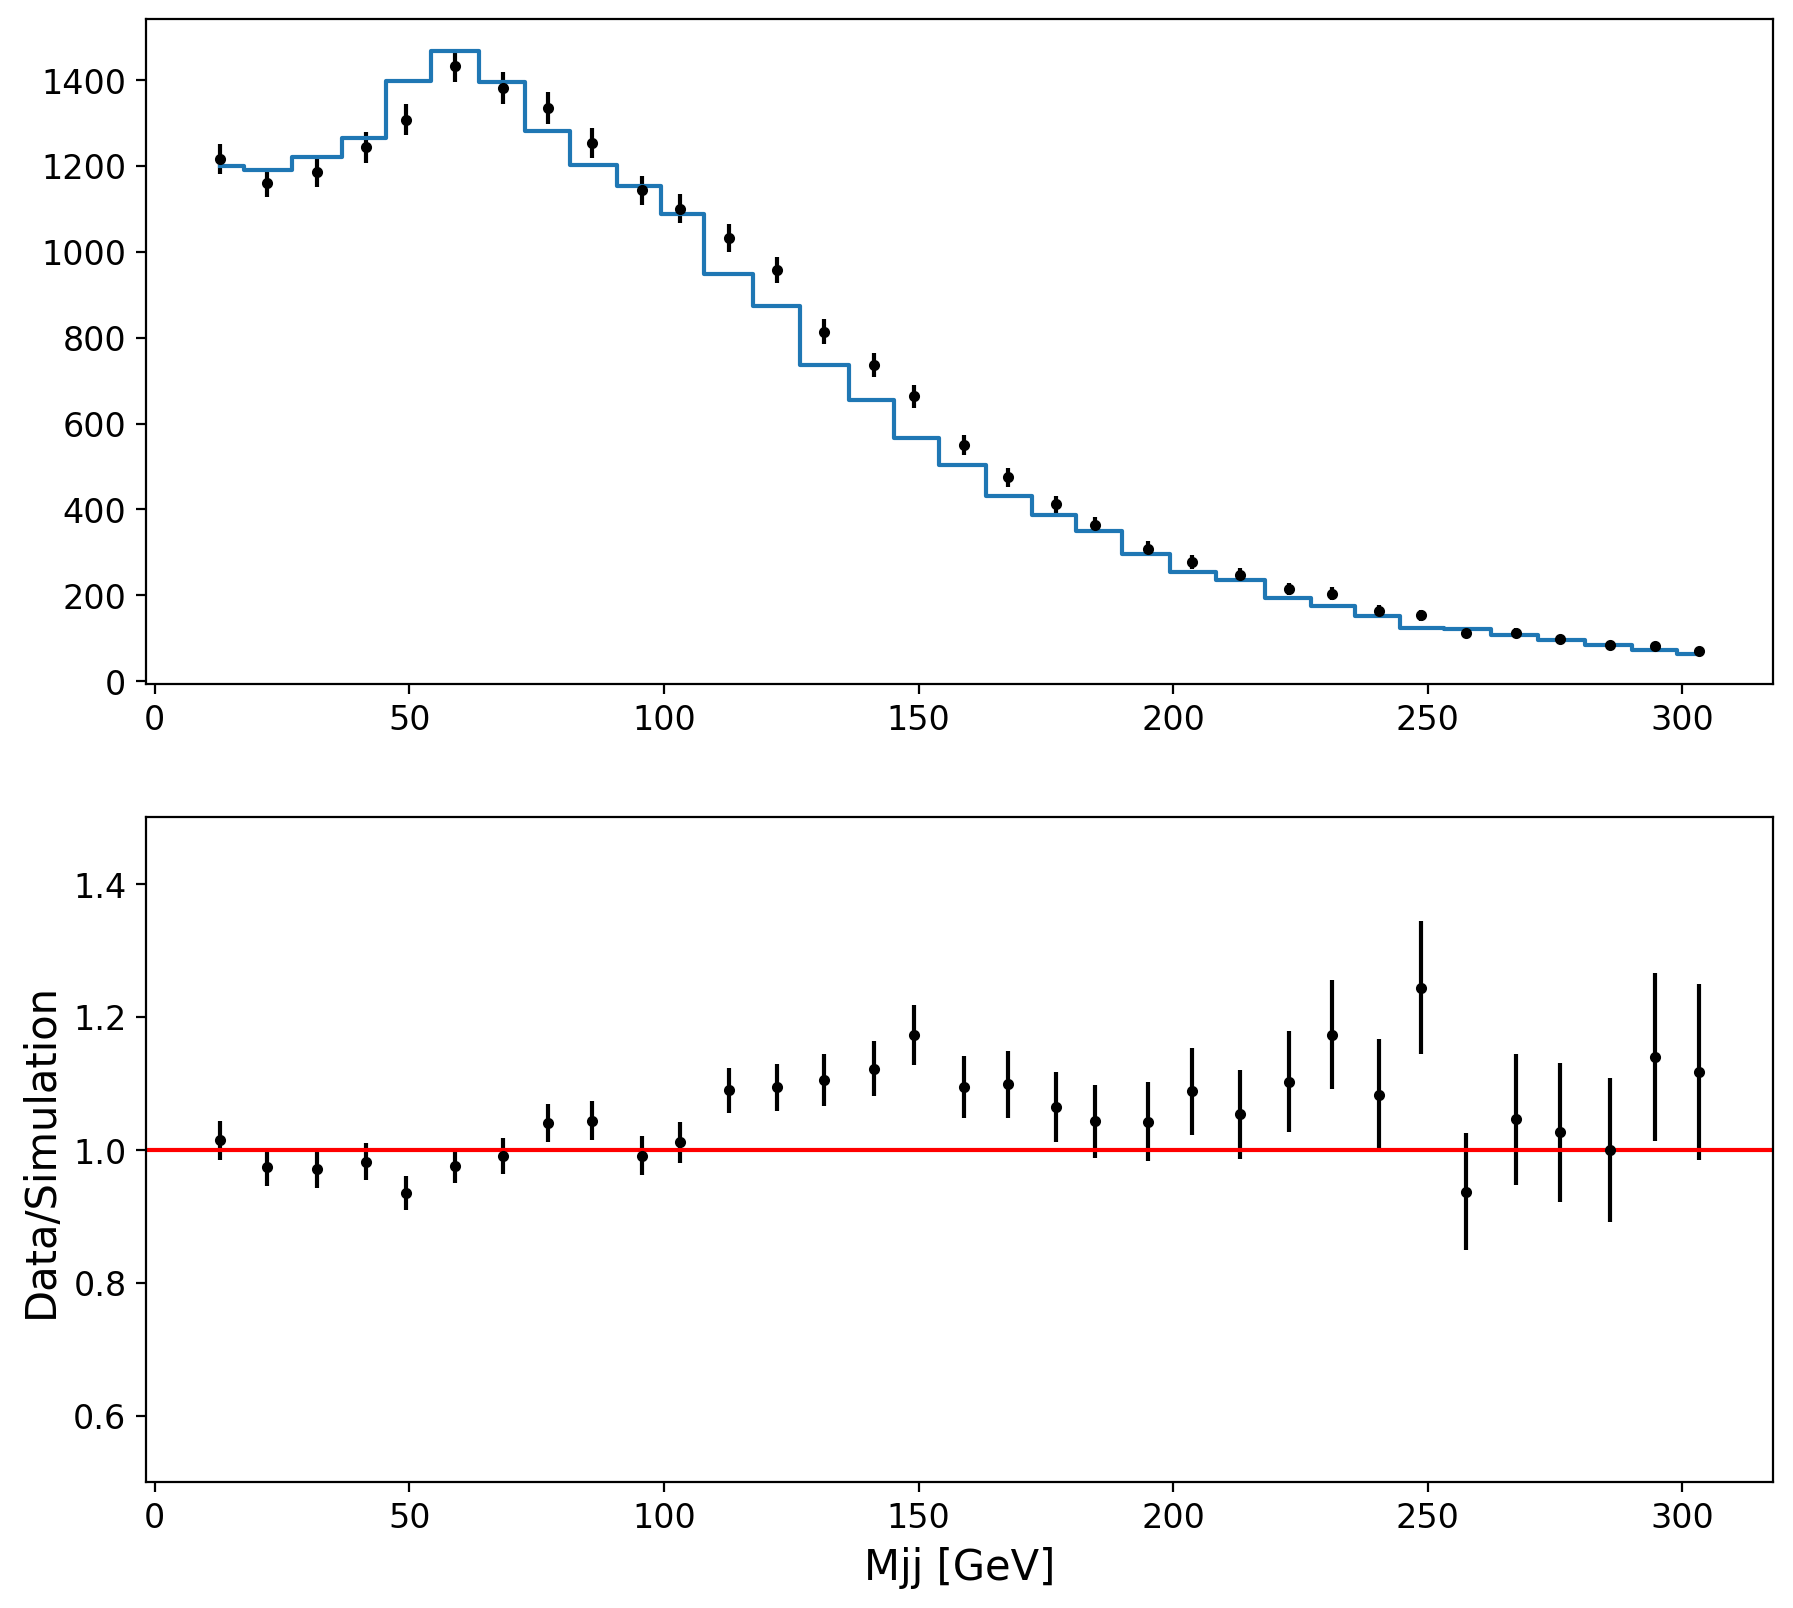

In [34]:
#>>>RUN: L2.7-runcell01

import csv
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

#load the file
def load(iName):
    label=iName
    datax=np.array([])
    datay=np.array([])
    datayerr=np.array([])
    with open(label,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=',')
        for row in plots:
            datax    = np.append(datax,float(row[0]))
            datay    = np.append(datay,float(row[1]))
            datayerr = np.append(datayerr,np.sqrt(float(row[1])))
    return datax,datay,datayerr

#compute the ratio between data and simulation
def histratio(iydata,iyderr,iysim):
    newydata=np.array([])
    newyderr=np.array([])
    for i0 in range(len(iysim)):
        ynew=iydata[i0]/iysim[i0]
        yner=iyderr[i0]/iysim[i0]
        newydata=np.append(newydata,ynew)
        newyderr=np.append(newyderr,yner)
    return newydata,newyderr

fig = plt.figure(figsize=(10.5, 9.5))
ax = fig.add_subplot(2,1,1)
datax,datay,datayerr=load("data/tmpdata.txt")
simx,simy,simyerr=load("data/tmpmc.txt")
plt.errorbar(datax,datay,yerr=datayerr,marker='.',c='black',linestyle = 'None')
plt.plot    (datax,simy,drawstyle = 'steps-mid')
ax = fig.add_subplot(2,1,2)
yrdata,yrderr=histratio(datay,datayerr,simy)
ax.errorbar(datax,yrdata,yerr=yrderr,marker='.',c='black',linestyle = 'None')
ax.axhline(1, c='red')
ax.set_ylim(0.5,1.5)
plt.xlabel("Mjj [GeV]")
plt.ylabel("Data/Simulation")
plt.show()


We can define a shift in a histogram by just shuffling events in bins. This we do by 


$$
\begin{align}
f(x^{\prime}) & =f(x-\sigma)\approx f(x)-\frac{df}{dx}\sigma\\
 & =f(x)-\frac{f(x)-f(x-\Delta x)}{\Delta x}\sigma\\
 & =f(x)\left(1-\frac{\sigma}{\Delta x}\right)+f(x-\Delta x)\frac{\sigma}{\Delta x}
\end{align}
$$

which we can rewrite in terms of bin shifts with a fractional uncertainty of $\textrm{s}=\frac{\sigma}{\Delta x}$. This gives us


$$
\begin{equation}
\rm{bin_{i}} = (1-s)\rm{bin}_{i} + (s) \rm{bin}_{i-1} \\
f(x_{i}) = f(x_{i})(1-s)+f(x-\Delta x)s
\end{equation}
$$

Such a shift could occur if there was an additional uncertainty in the invariant mass which had not been accounted for. Let's add this modification and see if a fractional shift can explain our deviation. 

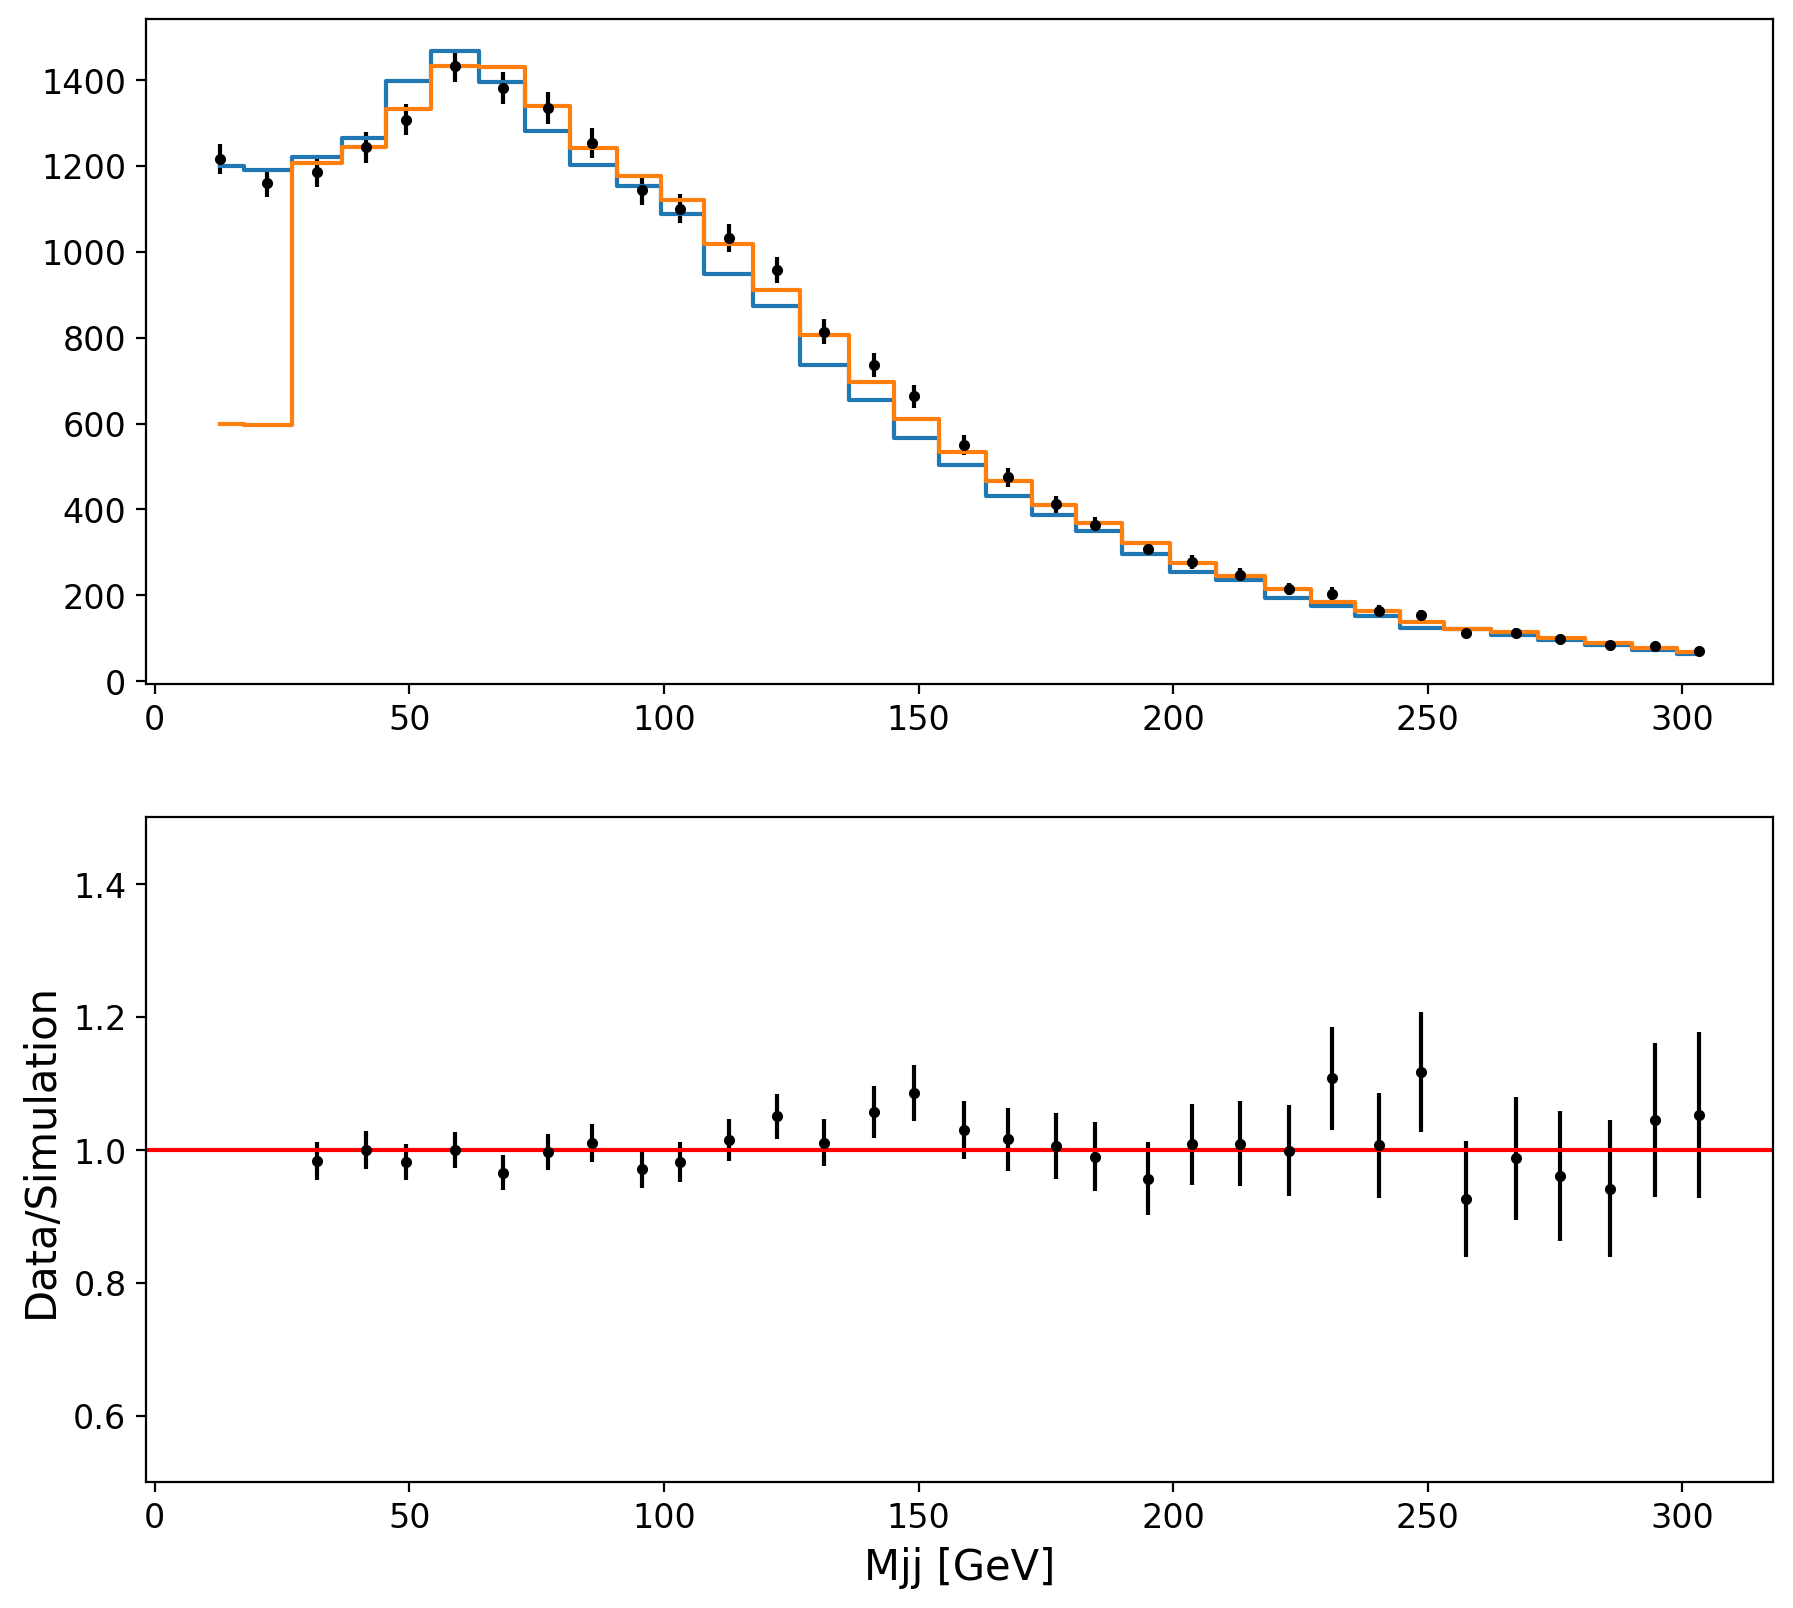

In [35]:
#>>>RUN: L2.7-runcell02

#Now let's shift the bins of the simulation by a fraction
def shifthist(isunc,isimy):
    newsimy=np.array([])
    for i0 in range(len(isimy)):
        ynew = isimy[i0]*(1-isunc)
        if i0 > 1:
            ynew = isimy[i0-1]*isunc + isimy[i0]*(1-isunc)
        newsimy=np.append(newsimy,ynew)
    return newsimy

            
fig = plt.figure(figsize=(10.5, 9.5))
ax = fig.add_subplot(2,1,1)
newsimy=shifthist(0.5,simy)
plt.errorbar(datax,datay,yerr=datayerr,marker='.',c='black',linestyle = 'None')
plt.plot    (datax,simy,drawstyle = 'steps-mid')
plt.plot    (datax,newsimy,drawstyle = 'steps-mid')

ax = fig.add_subplot(2,1,2)
yrdata,yrderr=histratio(datay,datayerr,newsimy)
ax.errorbar(datax,yrdata,yerr=yrderr,marker='.',c='black',linestyle = 'None')
ax.axhline(1, c='red')
ax.set_ylim(0.5,1.5)
plt.xlabel("Mjj [GeV]")
plt.ylabel("Data/Simulation")
plt.show()


We can see that a fractional shift of merely half the bin size is sufficient to explain this effect. Do you believe that the bump is real? 

As an aside, think about how unintuitive it is that simply shifting the prediction slightly in the horizontal axis results in what looks like a very clear peak when comparing to the data. This is a good example of how subtle effects can often produce what looks otherwise like a very obvious discovery.

If you are a big proponent of the existence of a peak, you could still see some evidence for a small excess in the data around 150. However, given that the vertical bars represent the independent statistical uncertainties, think about the probability that a few points will together deviate upward simply by chance.

<a name='exercises_2_7'></a>   

| [Top](#section_2_0) | [Restart Section](#section_2_7) |


>#### Follow-up 2.7.1a (ungraded)
>    
>Examine the CDF data further. Try other fractional shifts. Does the resulting fit look better or worse (look at the residuals)?
